In [1]:
# %load_ext rpy2.ipython

# Use Python kernel WITH rpy2 (OPTIONAL, more complex), if we need Python + R in the same notebook

In [2]:
# %%R
# install.packages("IRkernel")
# IRkernel::installspec()

In [3]:
install.packages(c(
  "data.table",
  "dplyr",
  "tidyr",
  "tidymodels",
  "recipes",
  "parsnip",
  "yardstick",
  "ggplot2",
  "ggcorrplot",
  "GGally"
))



The downloaded binary packages are in
	/var/folders/vq/9ksqctns5zl1tj5792ttp1qm0000gn/T//RtmpEaDWzZ/downloaded_packages


In [4]:
install.packages("S7")


The downloaded binary packages are in
	/var/folders/vq/9ksqctns5zl1tj5792ttp1qm0000gn/T//RtmpEaDWzZ/downloaded_packages


In [5]:
library(data.table)
library(dplyr)
library(tidyr)
library(tidymodels)
library(recipes)
library(parsnip)
library(yardstick)
library(ggplot2)
library(ggcorrplot)
library(GGally)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ────────────────────────────────────── tidymodels 1.4.1 ──

✔ broom        1.0.11     ✔ recipes      1.3.1 
✔ dials        1.4.2      ✔ rsample      1.3.1 
✔ ggplot2      4.0.1      ✔ tailor       0.1.0 
✔ infer        1.0.9      ✔ tune         2.0.1 
✔ modeldata    1.5.1      ✔ workflows    1.3.0 
✔ parsnip      1.4.0      ✔ workflowsets 1.1.1 
✔ purrr        1.2.0      ✔ yardstick    1.3.2 

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ purrr::discard()   masks scales::discard()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks 

In [6]:
# %%R


# # Read CSV file
# df <- fread("../data/social_media_ad_optimization_raw.csv", sep = ",")

# # Show first few rows
# head(df)


In [7]:
library(dplyr)
library(tidyr)
library(caret)
library(ggplot2)


Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:yardstick’:

    precision, recall, sensitivity, specificity


The following object is masked from ‘package:rsample’:

    calibration


The following object is masked from ‘package:purrr’:

    lift




In [8]:
install.packages(c(
  "data.table",
  "dplyr",
  "tidyr",
  "tidymodels",
  "recipes",
  "parsnip",
  "yardstick",
  "ggplot2",
  "ggcorrplot",
  "GGally"
))



The downloaded binary packages are in
	/var/folders/vq/9ksqctns5zl1tj5792ttp1qm0000gn/T//RtmpEaDWzZ/downloaded_packages


In [9]:
install.packages(c(
  "caret","readr"
))



The downloaded binary packages are in
	/var/folders/vq/9ksqctns5zl1tj5792ttp1qm0000gn/T//RtmpEaDWzZ/downloaded_packages


In [10]:
# install.packages("readr")

In [ ]:
library(readr)

df <- read_csv("/Users/shithilshetty/Documents/Projects/ctr-prediction-engagement-modeling/data/social_media_ad_optimization_raw.csv")
head(df)

Rows: 500 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): user_id, gender, location, interests, ad_id, ad_category, ad_platf...
dbl  (6): age, impressions, clicks, conversion, time_spent_on_ad, engagement...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


user_id,age,gender,location,interests,ad_id,ad_category,ad_platform,ad_type,impressions,clicks,conversion,time_spent_on_ad,day_of_week,device_type,engagement_score
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
U0001,58,M,USA,Food,A0001,Sportswear,Facebook,Image,3,0,0,3.38,Friday,Mobile,0.02
U0002,55,F,USA,Tech,A0002,Electronics,Facebook,Image,9,9,1,6.77,Saturday,Tablet,0.93
U0003,52,F,UK,Gaming,A0003,Luggage,Instagram,Image,13,12,1,13.26,Wednesday,Mobile,0.93
U0004,31,F,USA,Tech,A0004,Gadgets,Facebook,Video,14,5,0,24.41,Saturday,Desktop,0.28
U0005,52,M,India,Tech,A0005,Luggage,Instagram,Carousel,10,5,0,21.43,Monday,Tablet,0.35
U0006,32,F,USA,Fashion,A0006,Electronics,Instagram,Video,8,5,1,11.30,Saturday,Desktop,0.77


In [ ]:
library(dplyr)

df <- df %>% 
  filter(!is.na(conversion)) %>% 
  mutate(conversion = as.numeric(conversion)) %>%  
  as.data.frame()

target <- "conversion"

drop_cols <- c("user_id", "ad_id")
df <- df %>% select(-any_of(drop_cols))

numeric_features <- intersect(c("age", "impressions", "clicks", "time_spent_on_ad"), names(df))
categorical_features <- intersect(c("gender", "location", "interests", "ad_category",
                                   "ad_platform", "ad_type", "day_of_week", "device_type"), names(df))

cat("numeric:", paste(numeric_features, collapse = ", "), "\n")
cat("categorical:", paste(categorical_features, collapse = ", "), "\n")


numeric: age, impressions, clicks, time_spent_on_ad 
categorical: gender, location, interests, ad_category, ad_platform, ad_type, day_of_week, device_type 


In [ ]:
library(rsample)
library(dplyr)

X <- df %>% select(all_of(c(numeric_features, categorical_features)))
y <- df[[target]]

data_all <- df %>% select(all_of(c(numeric_features, categorical_features, target)))

set.seed(42)
data_split <- initial_split(data_all, prop = 0.8, strata = conversion)
train_data <- training(data_split)
test_data  <- testing(data_split)
train_data$conversion <- factor(train_data$conversion, levels = c(0, 1))
test_data$conversion  <- factor(test_data$conversion,  levels = c(0, 1))


cat("Train rows:", nrow(train_data),
    "| Test rows:", nrow(test_data),
    "| Positive rate (train):", mean(train_data$conversion), "\n")


Warning message in mean.default(train_data$conversion):
“argument is not numeric or logical: returning NA”


Train rows: 400 | Test rows: 100 | Positive rate (train): NA 


In [ ]:
library(recipes)

preprocessor <- recipe(conversion ~ ., data = train_data) %>%
  step_rm(any_of(c("user_id", "ad_id"))) %>%
  
  step_impute_median(all_of(numeric_features)) %>%
  
  step_normalize(all_of(numeric_features)) %>%
  
  step_impute_mode(all_of(categorical_features)) %>%
  
  step_dummy(all_of(categorical_features), one_hot = TRUE)


In [9]:
install.packages("xgboost", type = "binary")



The downloaded binary packages are in
	/var/folders/vq/9ksqctns5zl1tj5792ttp1qm0000gn/T//RtmpVh6r7F/downloaded_packages


In [ ]:
library(parsnip)
library(workflows)

if ("xgboost" %in% rownames(installed.packages())) {
  MODEL_NAME <- "xgboost"
  message("Using model: XGBoost")
} else {
  MODEL_NAME <- "decision_tree"
  message("XGBoost not found, using fallback model: Decision Tree")
}

if (MODEL_NAME == "xgboost") {
  clf_model <- boost_tree(
    trees = 300,
    learn_rate = 0.05
  ) %>%
    set_engine("xgboost") %>%
    set_mode("classification")
  
} else {
  clf_model <- decision_tree(
    tree_depth = 6
  ) %>%
    set_engine("rpart") %>%
    set_mode("classification")
}

clf_workflow <- workflow() %>%
  add_recipe(preprocessor) %>%
  add_model(clf_model)


Using model: XGBoost



In [ ]:
library(rsample)

set.seed(0)
train_val_split <- initial_split(train_data, prop = 0.85, strata = conversion)
train_sub <- training(train_val_split)
val_sub   <- testing(train_val_split)

train_sub$conversion <- as.factor(train_sub$conversion)
val_sub$conversion   <- as.factor(val_sub$conversion)

if (MODEL_NAME == "xgboost") {
  clf_lr_fit <- clf_workflow %>%
    fit(
      data = train_sub,
      control = control_workflow()
    )
  
} else {
  clf_lr_fit <- clf_workflow %>%
    fit(data = train_data)
}


In [64]:
names(predict(clf_lr_fit, new_data = test_data, type = "prob"))


[1] ".pred_0" ".pred_1"

In [ ]:
library(yardstick)
library(dplyr)

preds <- predict(clf_lr_fit, new_data = test_data, type = "prob")

y_proba <- preds$.pred_1

y_pred <- ifelse(y_proba >= 0.5, 1, 0)

results <- test_data %>%
  mutate(
    y_pred = factor(y_pred, levels = c(0, 1)),
    conversion = factor(conversion, levels = c(0, 1)),
    .pred_1 = y_proba  
  )

roc_auc_val <- roc_auc(results, truth = conversion, .pred_1)
cat("Test ROC-AUC:", round(roc_auc_val$.estimate, 4), "\n")

report <- results %>%
  summarise(
    accuracy  = accuracy_vec(conversion, y_pred),
    precision = precision_vec(conversion, y_pred),
    recall    = recall_vec(conversion, y_pred),
    f1        = f_meas_vec(conversion, y_pred)
  )

print(report)


Test ROC-AUC: 0.4211 
  accuracy precision    recall  f1
1     0.56 0.5789474 0.6226415 0.6


In [ ]:
library(dplyr)
library(tidyr)
library(purrr)

best_day_device_by_country <- function(model, df, numeric_features, categorical_features,
                                       country_col = "location",
                                       day_col = "day_of_week",
                                       device_col = "device_type",
                                       topk = 3) {
  
  results <- list()
  
  countries <- unique(na.omit(df[[country_col]]))
  days_all <- unique(na.omit(df[[day_col]]))
  devices_all <- unique(na.omit(df[[device_col]]))
  
  for (country in countries) {
    sub <- df %>% filter(!!sym(country_col) == country)
    if (nrow(sub) == 0) next
    
    baseline <- map_dbl(numeric_features, ~ median(sub[[.x]], na.rm = TRUE))
    names(baseline) <- numeric_features
    
    baseline_cat <- list()
    for (f in categorical_features) {
      if (f %in% c(day_col, device_col, country_col)) next
      if (f %in% names(sub) && any(!is.na(sub[[f]]))) {
        baseline_cat[[f]] <- names(sort(table(sub[[f]]), decreasing = TRUE))[1]
      } else if (f %in% names(df)) {
        baseline_cat[[f]] <- names(sort(table(df[[f]]), decreasing = TRUE))[1]
      } else {
        baseline_cat[[f]] <- NA
      }
    }
    
    combo_grid <- expand.grid(
      day = days_all,
      device = devices_all,
      stringsAsFactors = FALSE
    )
    
    combo_grid[[country_col]] <- country
    
    for (f in numeric_features) {
      combo_grid[[f]] <- baseline[[f]]
    }
    
    for (f in names(baseline_cat)) {
      combo_grid[[f]] <- baseline_cat[[f]]
    }
    
    names(combo_grid)[names(combo_grid) == "day"] <- day_col
    names(combo_grid)[names(combo_grid) == "device"] <- device_col
    
    features_used <- c(numeric_features, categorical_features)
    features_used <- features_used[features_used %in% names(combo_grid)]
    X_grid <- combo_grid[, features_used, drop = FALSE]
    
    preds <- predict(model, new_data = X_grid, type = "prob")
    combo_grid$predicted_conversion_prob <- preds$.pred_1
    
    top_rows <- combo_grid %>%
      arrange(desc(predicted_conversion_prob)) %>%
      slice_head(n = topk) %>%
      select(all_of(country_col), all_of(day_col), all_of(device_col), predicted_conversion_prob)
    
    results[[country]] <- top_rows
  }
  
  bind_rows(results)
}

In [67]:
results <- best_day_device_by_country(
  model = clf_lr_fit,
  df = df,
  numeric_features = c("age", "impressions", "clicks", "time_spent_on_ad"),
  categorical_features = c("gender", "location", "interests", "ad_category", "ad_platform", "ad_type", "day_of_week", "device_type")
)


In [ ]:
results <- best_day_device_by_country(
  model = clf_lr_fit,
  df = df,
  numeric_features = numeric_features,
  categorical_features = categorical_features,
  country_col = "location",
  day_col = "day_of_week",
  device_col = "device_type",
  topk = 3
)

if ("country" %in% names(results) && !"location" %in% names(results)) {
  names(results)[names(results) == "country"] <- "location"
}

results_sorted <- results %>%
  arrange(location, desc(predicted_conversion_prob)) %>%
  group_by(location) %>%
  mutate(rank = row_number()) %>%
  ungroup()

head(results_sorted, 10)


location,day_of_week,device_type,predicted_conversion_prob,rank
<chr>,<chr>,<chr>,<dbl>,<int>
Australia,Thursday,Desktop,0.8958414,1
Australia,Sunday,Desktop,0.8487077,2
Australia,Thursday,Mobile,0.8470424,3
Canada,Thursday,Desktop,0.8192800,1
Canada,Friday,Desktop,0.7575433,2
Canada,Saturday,Desktop,0.7518625,3
Germany,Thursday,Desktop,0.9540477,1
Germany,Thursday,Mobile,0.9458590,2
Germany,Saturday,Desktop,0.9404060,3


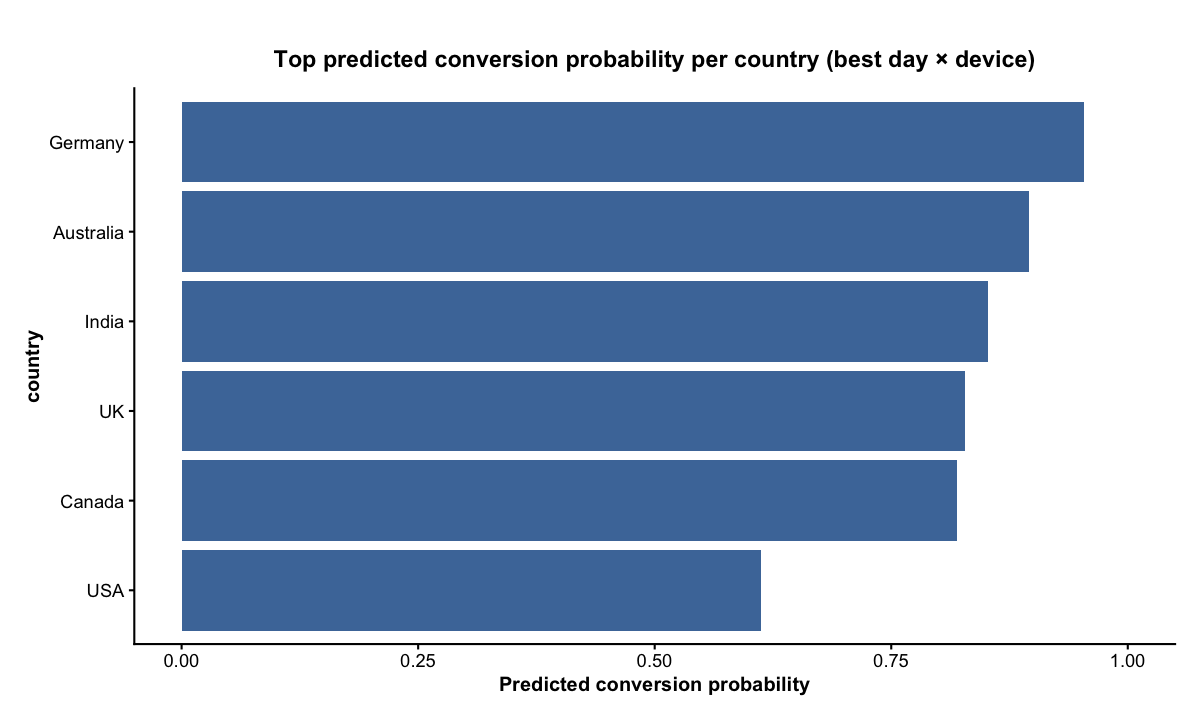

In [ ]:
library(ggplot2)
library(dplyr)

top1 <- results_sorted %>%
  group_by(location) %>%
  slice_max(order_by = predicted_conversion_prob, n = 1, with_ties = FALSE) %>%
  ungroup()

ggplot(top1, aes(x = predicted_conversion_prob, 
                 y = reorder(location, predicted_conversion_prob))) +
  geom_col(fill = "#4C78A8") +
  labs(
    title = "Top predicted conversion probability per country (best day × device)",
    x = "Predicted conversion probability",
    y = "country"
  ) +
  theme_classic(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5, size = 14, margin = margin(b = 10)),
    axis.title.x = element_text(size = 12, face = "bold"),
    axis.title.y = element_text(size = 12, face = "bold"),
    axis.text = element_text(size = 11),
    axis.line = element_line(colour = "black"),
    axis.ticks = element_line(colour = "black"),
    plot.margin = margin(t = 30, r = 15, b = 15, l = 15) 
  ) +
  coord_cartesian(xlim = c(0, 1), clip = "off")

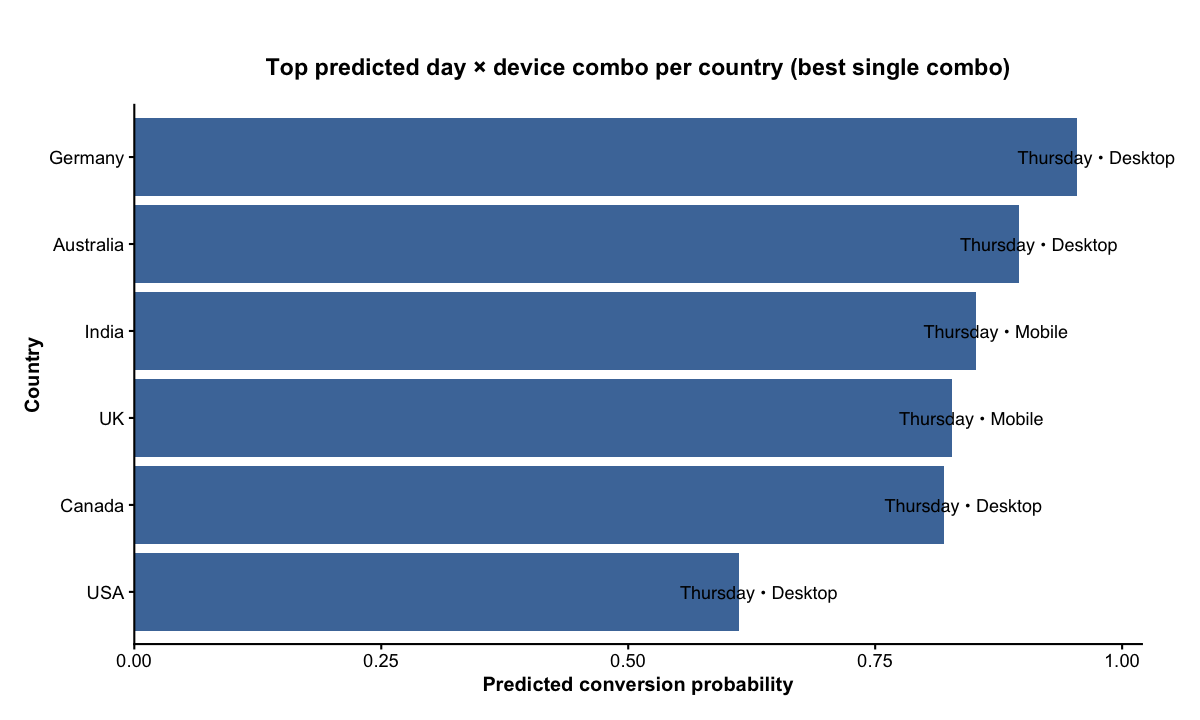

In [ ]:
library(ggplot2)
library(dplyr)

top1 <- results_sorted %>%
  group_by(location) %>%
  slice_max(order_by = predicted_conversion_prob, n = 1, with_ties = FALSE) %>%
  ungroup() %>%
  arrange(desc(predicted_conversion_prob)) %>%
  mutate(label = paste0(day_of_week, " • ", device_type))

max_x <- max(top1$predicted_conversion_prob, na.rm = TRUE)

ggplot(top1,
       aes(x = predicted_conversion_prob,
           y = reorder(location, predicted_conversion_prob))) +
  geom_col(fill = "#4C78A8") +
  geom_text(aes(x = predicted_conversion_prob + 0.02, label = label),
            vjust = 0.5, size = 3.8, family = "sans") +
  scale_x_continuous(
    limits = c(0, min(1, max_x + 0.15)),
    expand = expansion(mult = c(0, 0.02))
  ) +
  labs(
    title = "Top predicted day × device combo per country (best single combo)",
    x = "Predicted conversion probability",
    y = "Country"
  ) +
  theme_classic(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5, size = 14, margin = margin(b = 15)),
    axis.title.x = element_text(size = 12, face = "bold"),
    axis.title.y = element_text(size = 12, face = "bold"),
    axis.text = element_text(size = 11),
    axis.line = element_line(colour = "black"),
    axis.ticks = element_line(colour = "black"),
    plot.margin = margin(t = 35, r = 35, b = 15, l = 15) 
  ) +
  coord_cartesian(clip = "off")


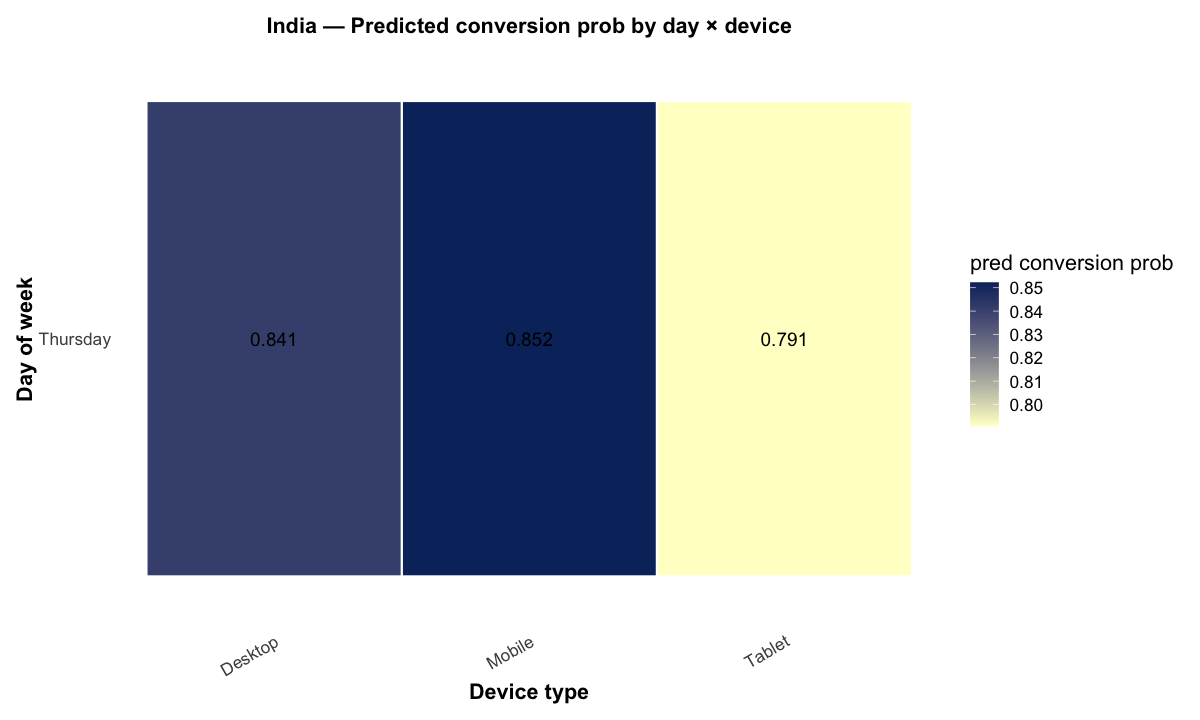

In [ ]:
library(ggplot2)
library(dplyr)
library(tidyr)

plot_heatmap_for_country <- function(country_name) {
  sub <- results_sorted %>%
    filter(location == country_name)
  
  if (nrow(sub) == 0) {
    message(paste("No results for", country_name))
    return(NULL)
  }
  
  sub <- sub %>%
    select(day_of_week, device_type, predicted_conversion_prob)
  
  pivot <- sub %>%
    pivot_wider(
      names_from = device_type,
      values_from = predicted_conversion_prob,
      values_fn = mean
    )
  
  heatmap_df <- pivot %>%
    pivot_longer(
      cols = -day_of_week,
      names_to = "device_type",
      values_to = "predicted_conversion_prob"
    )
  
  ggplot(heatmap_df, aes(x = device_type, y = day_of_week, fill = predicted_conversion_prob)) +
    geom_tile(color = "white", linewidth = 0.6) +
    geom_text(aes(label = sprintf("%.3f", predicted_conversion_prob)), size = 4) +
    scale_fill_gradient(low = "#FFFFCC", high = "#08306B", name = "pred conversion prob") +
    labs(
      title = paste0(country_name, " — Predicted conversion prob by day × device"),
      x = "Device type",
      y = "Day of week"
    ) +
    theme_minimal(base_size = 13) +
    theme(
      plot.title = element_text(hjust = 0.5, face = "bold", size = 13, margin = margin(b = 10)),
      axis.title = element_text(face = "bold"),
      axis.text.x = element_text(angle = 30, hjust = 1),
      panel.grid = element_blank(),
      legend.position = "right",
      plot.margin = margin(10, 10, 10, 10)
    )
}


plot_heatmap_for_country("India")


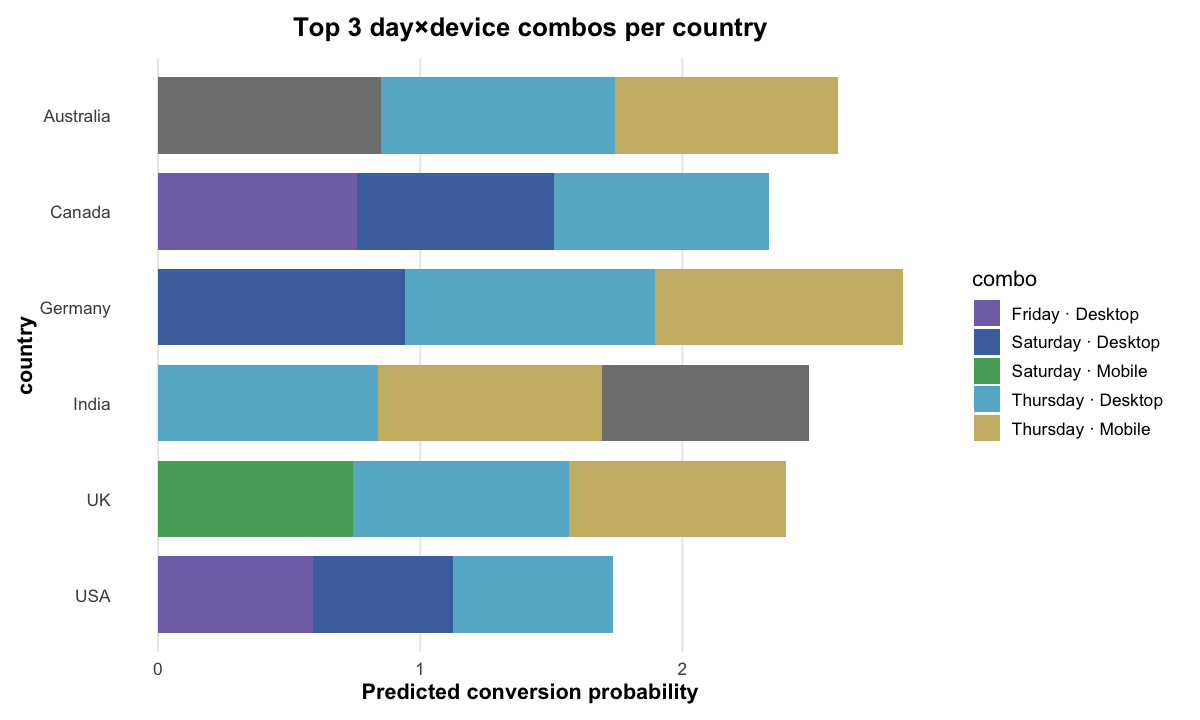

In [72]:
library(ggplot2)
library(dplyr)
library(forcats)

top3 <- results_sorted %>%
  group_by(location) %>%
  slice_max(order_by = predicted_conversion_prob, n = 3, with_ties = FALSE) %>%
  ungroup() %>%
  mutate(
    combo = paste(day_of_week, "·", device_type)
  )

combo_colors <- c(
  "Saturday · Desktop" = "#4C72B0",
  "Saturday · Mobile"  = "#55A868",
  "Saturday · Tablet"  = "#C44E52",
  "Friday · Desktop"   = "#8172B2",
  "Thursday · Mobile"  = "#CCB974",
  "Thursday · Desktop" = "#64B5CD"
)

ggplot(top3, aes(x = predicted_conversion_prob, y = fct_rev(location), fill = combo)) +
  geom_col(position = position_stack(reverse = TRUE), width = 0.8) +
  scale_fill_manual(values = combo_colors, name = "combo") +
  labs(
    x = "Predicted conversion probability",
    y = "country",
    title = "Top 3 day×device combos per country"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5, margin = margin(b = 10)),
    axis.title.x = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold"),
    legend.position = "right",
    legend.justification = "center",
    panel.grid.major.y = element_blank(),
    panel.grid.minor = element_blank(),
    plot.margin = margin(10, 20, 10, 10)
  )


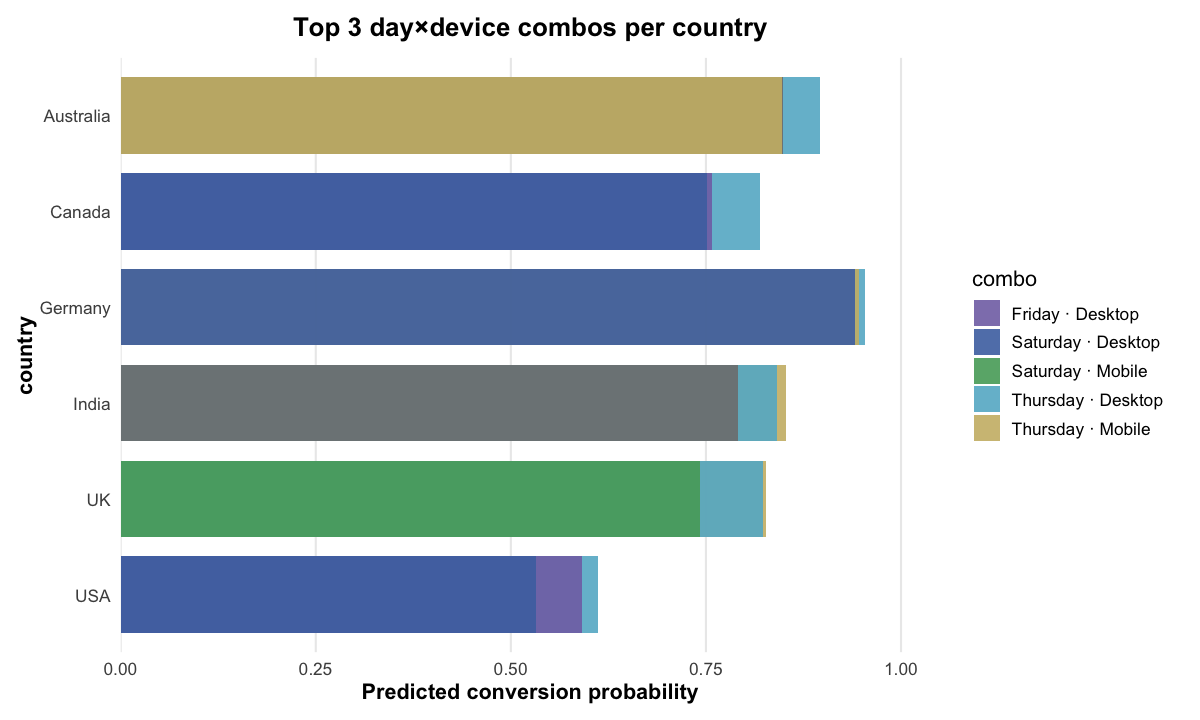

In [73]:
library(ggplot2)
library(dplyr)
library(forcats)

top3 <- results_sorted %>%
  group_by(location) %>%
  slice_max(order_by = predicted_conversion_prob, n = 3, with_ties = FALSE) %>%
  ungroup() %>%
  mutate(
    combo = paste(day_of_week, "·", device_type)
  )

combo_colors <- c(
  "Saturday · Desktop" = "#4C72B0",
  "Saturday · Mobile"  = "#55A868",
  "Saturday · Tablet"  = "#C44E52",
  "Friday · Desktop"   = "#8172B2",
  "Thursday · Mobile"  = "#CCB974",
  "Thursday · Desktop" = "#64B5CD"
)

ggplot(top3, aes(x = predicted_conversion_prob, y = fct_rev(location), fill = combo)) +
  geom_col(position = "identity", width = 0.8, alpha = 0.9) + 
  scale_fill_manual(values = combo_colors, name = "combo") +
  labs(
    x = "Predicted conversion probability",
    y = "country",
    title = "Top 3 day×device combos per country"
  ) +
  scale_x_continuous(limits = c(0, 1), expand = expansion(mult = c(0, 0.05))) +  
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5, margin = margin(b = 10)),
    axis.title.x = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold"),
    legend.position = "right",
    legend.justification = "center",
    panel.grid.major.y = element_blank(),
    panel.grid.minor = element_blank(),
    plot.margin = margin(10, 20, 10, 10)
  )



In [26]:
install.packages("ggrepel")
library(ggrepel)


The downloaded binary packages are in
	/var/folders/vq/9ksqctns5zl1tj5792ttp1qm0000gn/T//RtmpVh6r7F/downloaded_packages


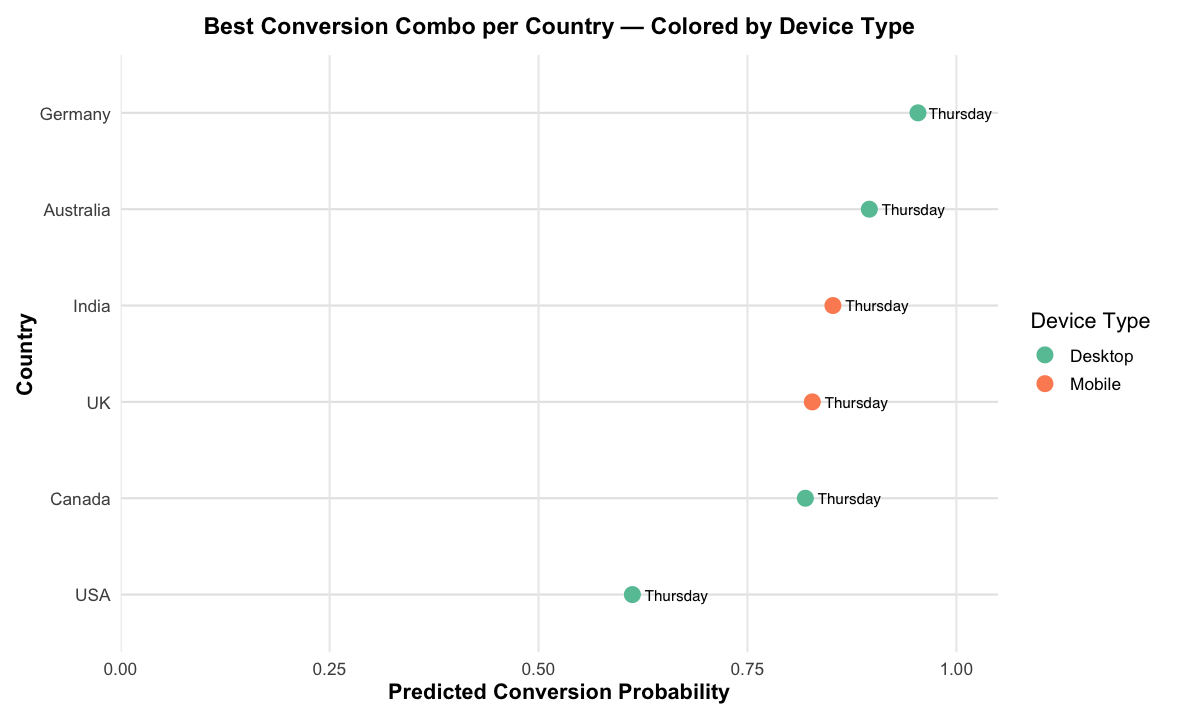

In [ ]:
library(ggplot2)
library(dplyr)
library(ggrepel) 

top1 <- results_sorted %>%
  group_by(location) %>%
  slice_max(order_by = predicted_conversion_prob, n = 1, with_ties = FALSE) %>%
  ungroup() %>%
  arrange(predicted_conversion_prob)  

ggplot(top1, aes(x = predicted_conversion_prob, y = reorder(location, predicted_conversion_prob))) +
  geom_point(aes(color = device_type), size = 4) +
  geom_text_repel(
    aes(label = day_of_week),
    hjust = 0,
    nudge_x = 0.015,
    size = 3.2,
    segment.color = "grey70",
    family = "sans"
  ) +
  scale_color_brewer(palette = "Set2", name = "Device Type") +
  labs(
    title = "Best Conversion Combo per Country — Colored by Device Type",
    x = "Predicted Conversion Probability",
    y = "Country"
  ) +
  scale_x_continuous(limits = c(0, 1), expand = expansion(mult = c(0, 0.05))) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5, size = 14, margin = margin(b = 10)),
    axis.title.x = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold"),
    legend.position = "right",
    legend.justification = "center",
    panel.grid.major.y = element_line(color = "grey90"),
    panel.grid.minor = element_blank(),
    plot.margin = margin(10, 25, 10, 10)
  )


`summarise()` has grouped output by 'location'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'location'. You can override using the
`.groups` argument.


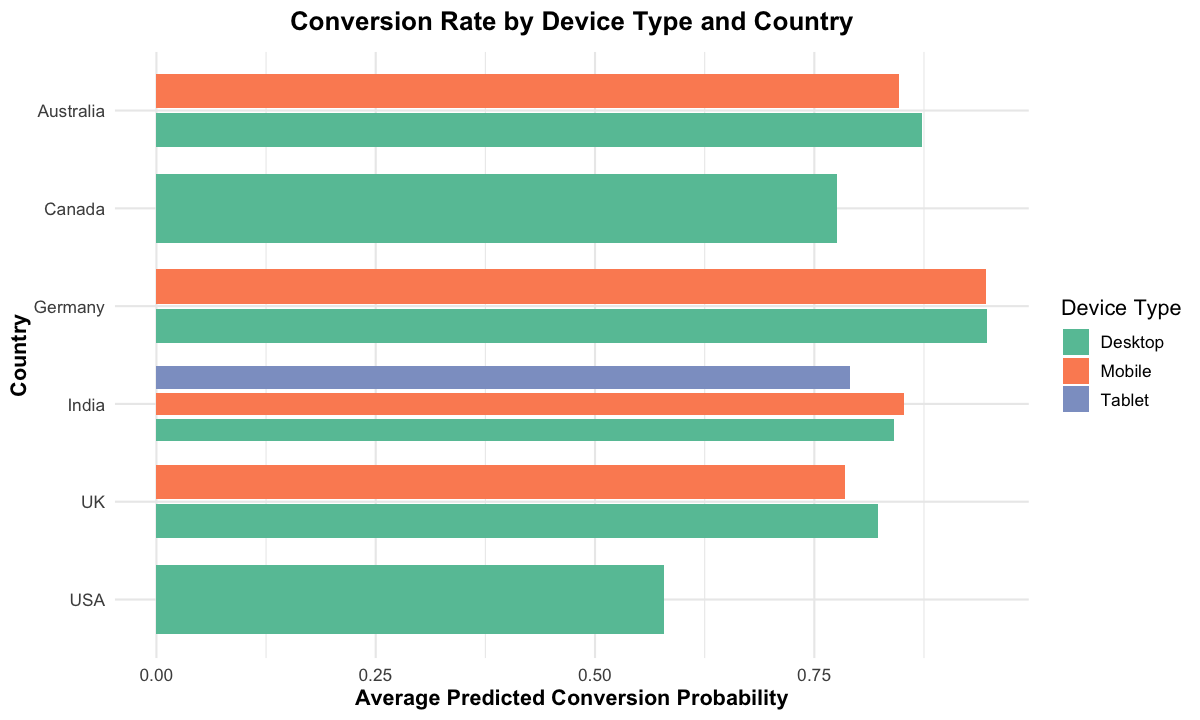

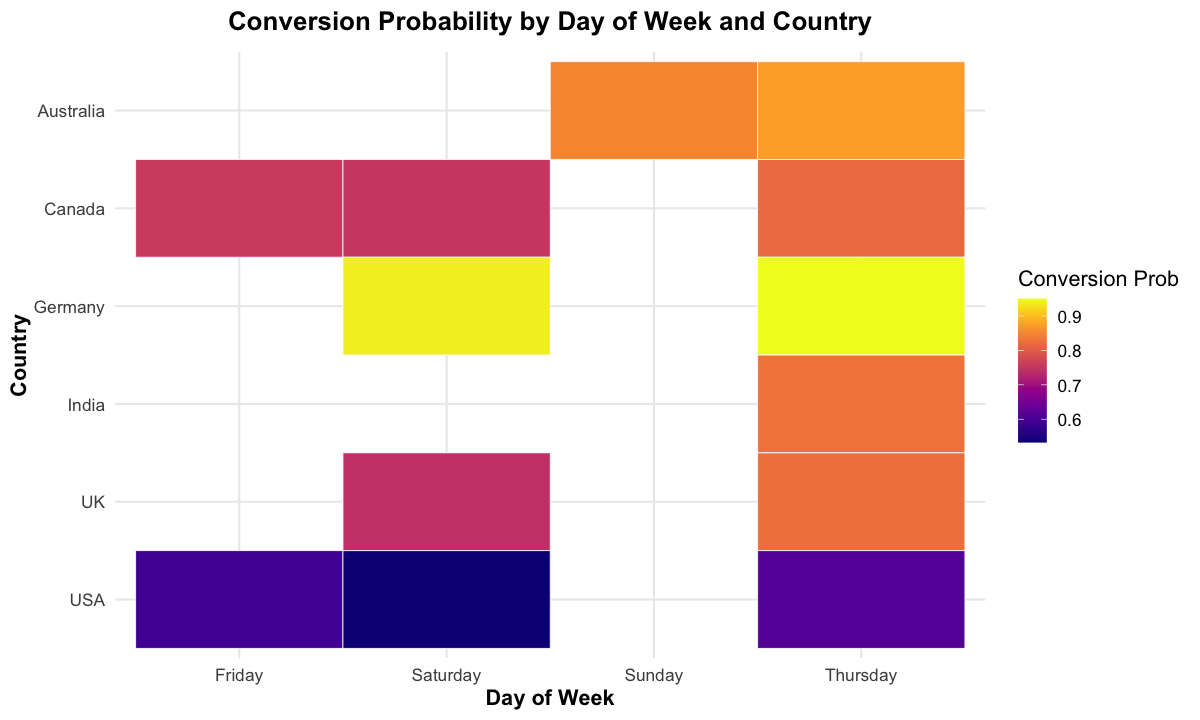

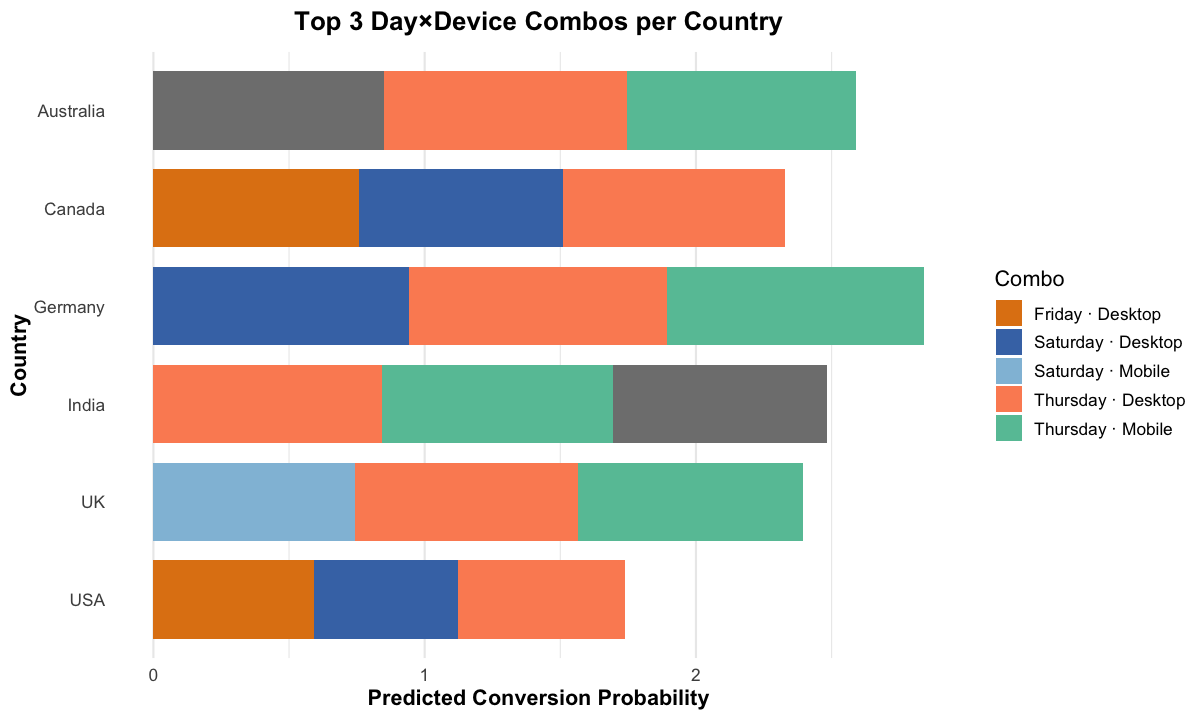

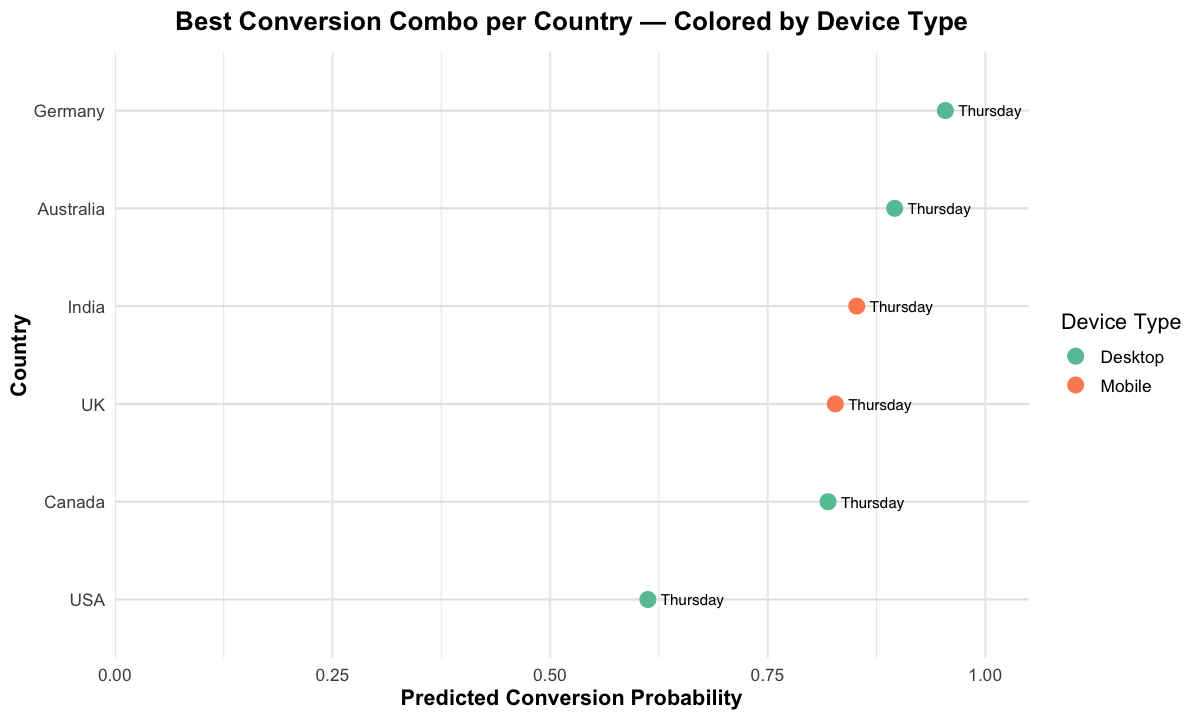

In [ ]:
library(ggplot2)
library(dplyr)
library(forcats)
library(ggrepel)
library(viridis)

device_perf <- results_sorted %>%
  group_by(location, device_type) %>%
  summarise(avg_conversion = mean(predicted_conversion_prob, na.rm = TRUE)) %>%
  ungroup()

ggplot(device_perf, aes(x = avg_conversion, y = fct_rev(location), fill = device_type)) +
  geom_col(position = position_dodge(width = 0.8), width = 0.7) +
  labs(
    title = "Conversion Rate by Device Type and Country",
    x = "Average Predicted Conversion Probability",
    y = "Country"
  ) +
  scale_fill_brewer(palette = "Set2", name = "Device Type") +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5, margin = margin(b = 10)),
    axis.title.x = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold"),
    legend.position = "right"
  )

heatmap_data <- results_sorted %>%
  group_by(location, day_of_week) %>%
  summarise(avg_conversion = mean(predicted_conversion_prob, na.rm = TRUE)) %>%
  ungroup()

ggplot(heatmap_data, aes(x = day_of_week, y = fct_rev(location), fill = avg_conversion)) +
  geom_tile(color = "white") +
  scale_fill_viridis(option = "C", name = "Conversion Prob") +
  labs(
    title = "Conversion Probability by Day of Week and Country",
    x = "Day of Week", y = "Country"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5, margin = margin(b = 10)),
    axis.title.x = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold"),
    legend.position = "right"
  )

top3 <- results_sorted %>%
  group_by(location) %>%
  slice_max(order_by = predicted_conversion_prob, n = 3, with_ties = FALSE) %>%
  ungroup() %>%
  mutate(combo = paste(day_of_week, "·", device_type))

combo_colors <- c(
  "Saturday · Desktop" = "#4575B4",
  "Saturday · Mobile"  = "#91BFDB",
  "Friday · Desktop"   = "#E08214",
  "Thursday · Desktop" = "#FC8D62",
  "Thursday · Mobile"  = "#66C2A5",
  "Saturday · Tablet"  = "#B2DF8A"
)

ggplot(top3, aes(x = predicted_conversion_prob, y = fct_rev(location), fill = combo)) +
  geom_col(position = position_stack(reverse = TRUE), width = 0.8) +
  scale_fill_manual(values = combo_colors, name = "Combo") +
  labs(
    title = "Top 3 Day×Device Combos per Country",
    x = "Predicted Conversion Probability",
    y = "Country"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5, margin = margin(b = 10)),
    axis.title.x = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold"),
    legend.position = "right",
    legend.justification = "center",
    panel.grid.major.y = element_blank()
  )

top1 <- results_sorted %>%
  group_by(location) %>%
  slice_max(order_by = predicted_conversion_prob, n = 1, with_ties = FALSE) %>%
  ungroup() %>%
  arrange(predicted_conversion_prob)

ggplot(top1, aes(x = predicted_conversion_prob, y = reorder(location, predicted_conversion_prob))) +
  geom_point(aes(color = device_type), size = 4) +
  geom_text_repel(
    aes(label = day_of_week),
    hjust = 0,
    nudge_x = 0.015,
    size = 3.2,
    segment.color = "grey70",
    family = "sans"
  ) +
  scale_color_brewer(palette = "Set2", name = "Device Type") +
  labs(
    title = "Best Conversion Combo per Country — Colored by Device Type",
    x = "Predicted Conversion Probability",
    y = "Country"
  ) +
  scale_x_continuous(limits = c(0, 1), expand = expansion(mult = c(0, 0.05))) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5, margin = margin(b = 10)),
    axis.title.x = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold"),
    legend.position = "right",
    legend.justification = "center",
    panel.grid.major.y = element_line(color = "grey90")
  )


Suggestion 3: Device × location adds limited incremental insight compared to day × device

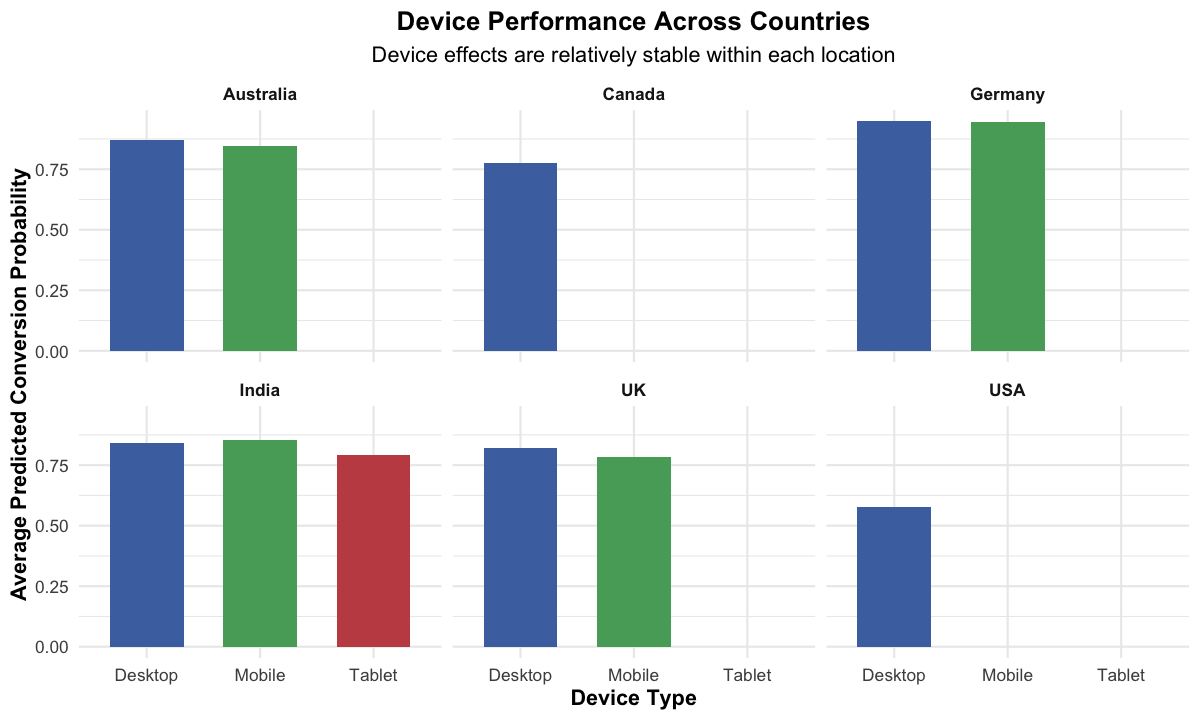

In [79]:
library(ggplot2)
library(dplyr)
library(forcats)

device_location <- results_sorted %>%
  group_by(location, device_type) %>%
  summarise(
    avg_conversion = mean(predicted_conversion_prob, na.rm = TRUE),
    .groups = "drop"
  )

ggplot(
  device_location,
  aes(
    x = device_type,
    y = avg_conversion,
    fill = device_type
  )
) +
  geom_col(width = 0.65) +
  facet_wrap(~ location, ncol = 3) +
  scale_fill_manual(
    values = c(
      "Desktop" = "#4C72B0",
      "Mobile"  = "#55A868",
      "Tablet"  = "#C44E52"
    ),
    guide = "none"
  ) +
  labs(
    title = "Device Performance Across Countries",
    subtitle = "Device effects are relatively stable within each location",
    x = "Device Type",
    y = "Average Predicted Conversion Probability"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5),
    plot.subtitle = element_text(hjust = 0.5),
    axis.title.x = element_text(face = "bold"),
    axis.title.y = element_text(face = "bold"),
    strip.text = element_text(face = "bold")
  )

In [80]:
library(readr)

df <- read_csv("/Users/shithilshetty/Documents/Projects/ctr-prediction-engagement-modeling/data/social_media_ad_optimization_raw.csv")
head(df)

Rows: 500 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): user_id, gender, location, interests, ad_id, ad_category, ad_platf...
dbl  (6): age, impressions, clicks, conversion, time_spent_on_ad, engagement...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


user_id,age,gender,location,interests,ad_id,ad_category,ad_platform,ad_type,impressions,clicks,conversion,time_spent_on_ad,day_of_week,device_type,engagement_score
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
U0001,58,M,USA,Food,A0001,Sportswear,Facebook,Image,3,0,0,3.38,Friday,Mobile,0.02
U0002,55,F,USA,Tech,A0002,Electronics,Facebook,Image,9,9,1,6.77,Saturday,Tablet,0.93
U0003,52,F,UK,Gaming,A0003,Luggage,Instagram,Image,13,12,1,13.26,Wednesday,Mobile,0.93
U0004,31,F,USA,Tech,A0004,Gadgets,Facebook,Video,14,5,0,24.41,Saturday,Desktop,0.28
U0005,52,M,India,Tech,A0005,Luggage,Instagram,Carousel,10,5,0,21.43,Monday,Tablet,0.35
U0006,32,F,USA,Fashion,A0006,Electronics,Instagram,Video,8,5,1,11.30,Saturday,Desktop,0.77


In [81]:
df <- df |> dplyr::select(-engagement_score)

X <- df |> dplyr::select(-user_id, -ad_id, -conversion)
y <- df$conversion

numeric_features <- c("age", "impressions", "clicks", "time_spent_on_ad")

categorical_features <- c(
  "gender", "location", "interests",
  "ad_category", "ad_platform",
  "ad_type", "day_of_week", "device_type"
)


In [82]:
library(recipes)

preprocessor <- recipe(conversion ~ ., data = df) %>%

  step_normalize(all_of(numeric_features)) %>%

  step_dummy(all_of(categorical_features), one_hot = TRUE)


In [83]:
library(tidymodels)

clf_lr <- logistic_reg(mode = "classification") %>%
  set_engine("glm", maxit = 300)

workflow_lr <- workflow() %>%
  add_recipe(preprocessor) %>%
  add_model(clf_lr)


── Attaching packages ────────────────────────────────────── tidymodels 1.4.1 ──

✔ broom        1.0.11     ✔ tailor       0.1.0 
✔ dials        1.4.2      ✔ tune         2.0.1 
✔ infer        1.0.9      ✔ workflowsets 1.1.1 
✔ modeldata    1.5.1      

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ dials::prune()    masks rpart::prune()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()



In [88]:
library(dplyr)
library(scales)

set.seed(42)

df <- df %>%
  mutate(conversion = as.factor(conversion))

data_split <- initial_split(df, prop = 0.8, strata = conversion)
train_data <- training(data_split)
test_data  <- testing(data_split)

predictor_vars <- setdiff(names(df), c("conversion", "user_id", "ad_id"))

formula_lr <- as.formula(paste("conversion ~", paste(predictor_vars, collapse = "+")))

X_train <- model.matrix(formula_lr, data = train_data)[, -1] 
y_train <- train_data$conversion

glm_fit <- glm(y_train ~ X_train, family = binomial())

X_full <- model.matrix(formula_lr, data = df)[, -1] 

coef_vec <- coef(glm_fit)[-1]  
intercept <- coef(glm_fit)[1]

linear_score <- as.vector(X_full %*% coef_vec + intercept)

df$engagement_score_supervised <- scales::rescale(linear_score, to = c(0,1))

df %>%
  select(user_id, clicks, time_spent_on_ad, ad_platform, ad_category, engagement_score_supervised) %>%
  head()

Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”


user_id,clicks,time_spent_on_ad,ad_platform,ad_category,engagement_score_supervised
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
U0001,0,3.38,Facebook,Sportswear,NA
U0002,9,6.77,Facebook,Electronics,NA
U0003,12,13.26,Instagram,Luggage,NA
U0004,5,24.41,Facebook,Gadgets,NA
U0005,5,21.43,Instagram,Luggage,NA
U0006,5,11.30,Instagram,Electronics,NA


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC: 0.637"


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


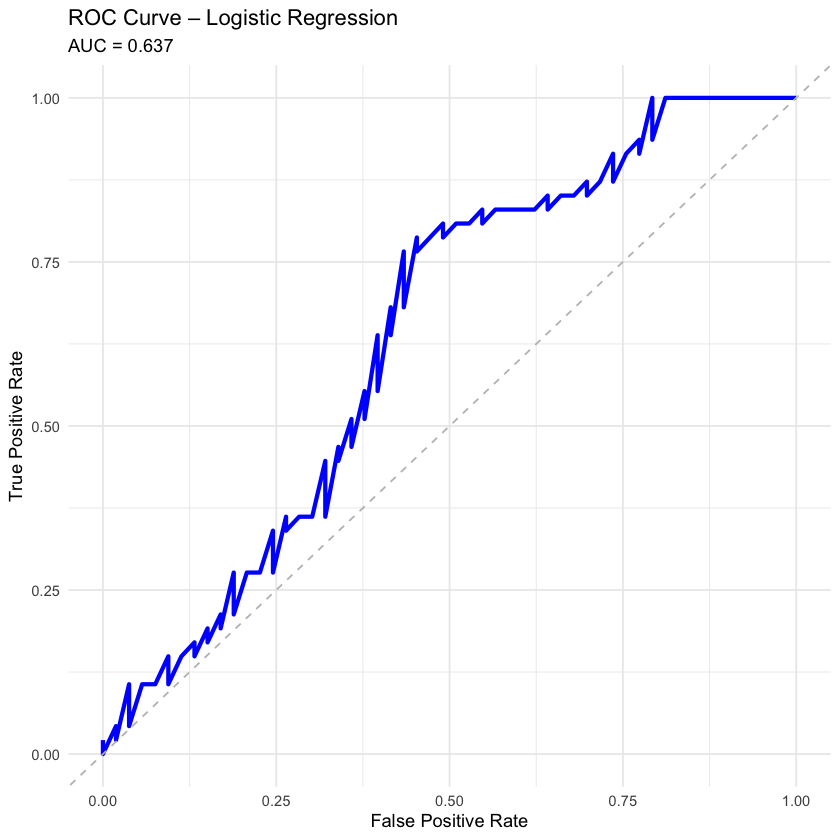

In [ ]:
library(pROC)
library(ggplot2)
library(dplyr)

y_true <- as.numeric(as.character(test_data$conversion)) 
y_prob <- predict(fit_lr, new_data = test_data, type = "prob") %>% pull(.pred_1)

roc_obj <- roc(response = y_true, predictor = y_prob)

auc_value <- auc(roc_obj)
print(paste("AUC:", round(auc_value, 3)))

roc_df <- data.frame(
  fpr = 1 - roc_obj$specificities,
  tpr = roc_obj$sensitivities
)

ggplot(roc_df, aes(x = fpr, y = tpr)) +
  geom_line(color = "blue", size = 1.2) +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "gray") +
  labs(
    title = "ROC Curve – Logistic Regression",
    x = "False Positive Rate",
    y = "True Positive Rate",
    subtitle = paste0("AUC = ", round(auc_value, 3))
  ) +
  theme_minimal()


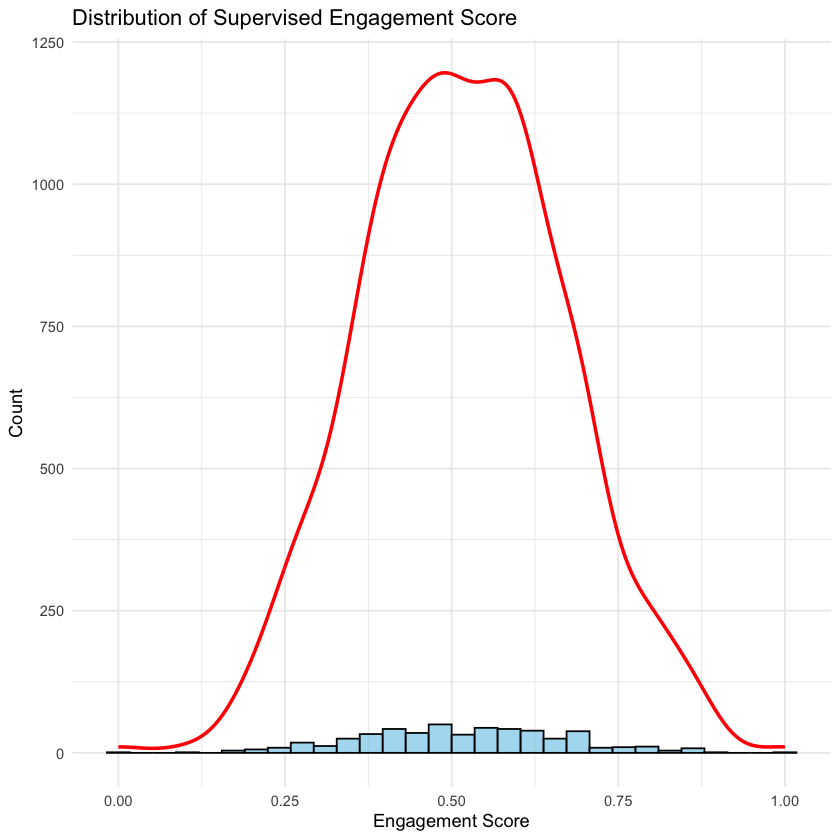

In [ ]:
library(ggplot2)

ggplot(df, aes(x = engagement_score_supervised)) +
  geom_histogram(aes(y = ..count..), bins = 30, fill = "skyblue", color = "black", alpha = 0.7) +
  geom_density(aes(y = ..count..), color = "red", size = 1) +
  labs(
    title = "Distribution of Supervised Engagement Score",
    x = "Engagement Score",
    y = "Count"
  ) +
  theme_minimal()


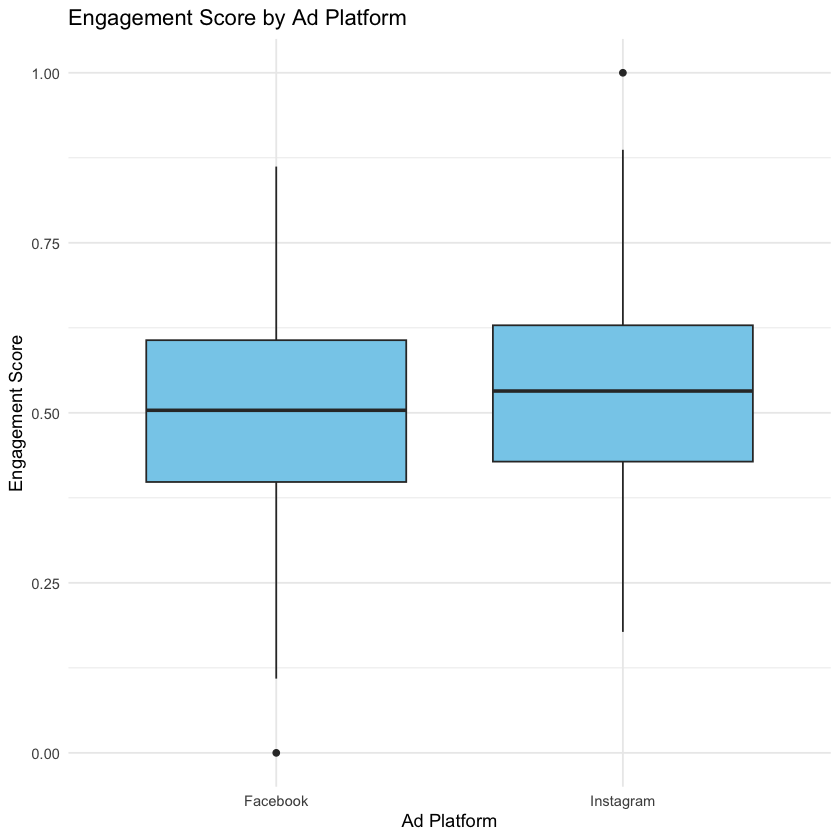

In [ ]:
library(ggplot2)

ggplot(df, aes(x = ad_platform, y = engagement_score_supervised)) +
  geom_boxplot(fill = "skyblue") +
  ylim(0, 1) +
  labs(
    title = "Engagement Score by Ad Platform",
    x = "Ad Platform",
    y = "Engagement Score"
  ) +
  theme_minimal()


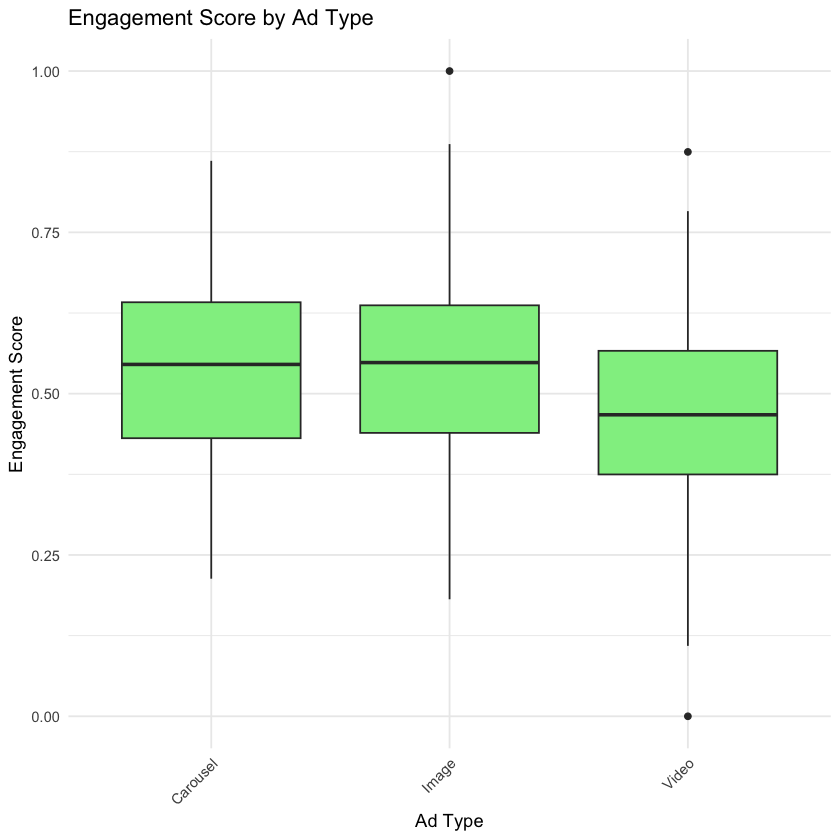

In [ ]:
library(ggplot2)

ggplot(df, aes(x = ad_type, y = engagement_score_supervised)) +
  geom_boxplot(fill = "lightgreen") +
  labs(
    title = "Engagement Score by Ad Type",
    x = "Ad Type",
    y = "Engagement Score"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [ ]:
install.packages("viridis")

also installing the dependency ‘gridExtra’





The downloaded binary packages are in
	/var/folders/vq/9ksqctns5zl1tj5792ttp1qm0000gn/T//RtmpmujZM3/downloaded_packages


In [ ]:
library(ggplot2)
library(viridis)

options(repr.plot.width = 14, repr.plot.height = 7)
top_features$sign <- ifelse(top_features$coefficient >= 0, "pos", "neg")

ggplot(top_features, aes(
  x = coefficient,
  y = reorder(feature, coefficient),
  fill = coefficient
)) +
  geom_col() +

  scale_fill_gradient2(
    low = "#D73027",      
    mid = "#f4cc60ff",      
    high = "#077537ff",     
    midpoint = 0
  ) +

  labs(
    title = "Top 20 Features Influencing Engagement",
    x = "Coefficient (Effect on Engagement)",
    y = "Feature",
    fill = "Coefficient"
  ) +

   theme_minimal(base_size = 16) +  
  theme(
    plot.title = element_text(
      hjust = 0.5,
      size = 22,         
      face = "bold"
    ),
    axis.title = element_text(size = 18),    
    axis.text = element_text(size = 14),    
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14)
  )

ERROR: Error: object 'top_features' not found


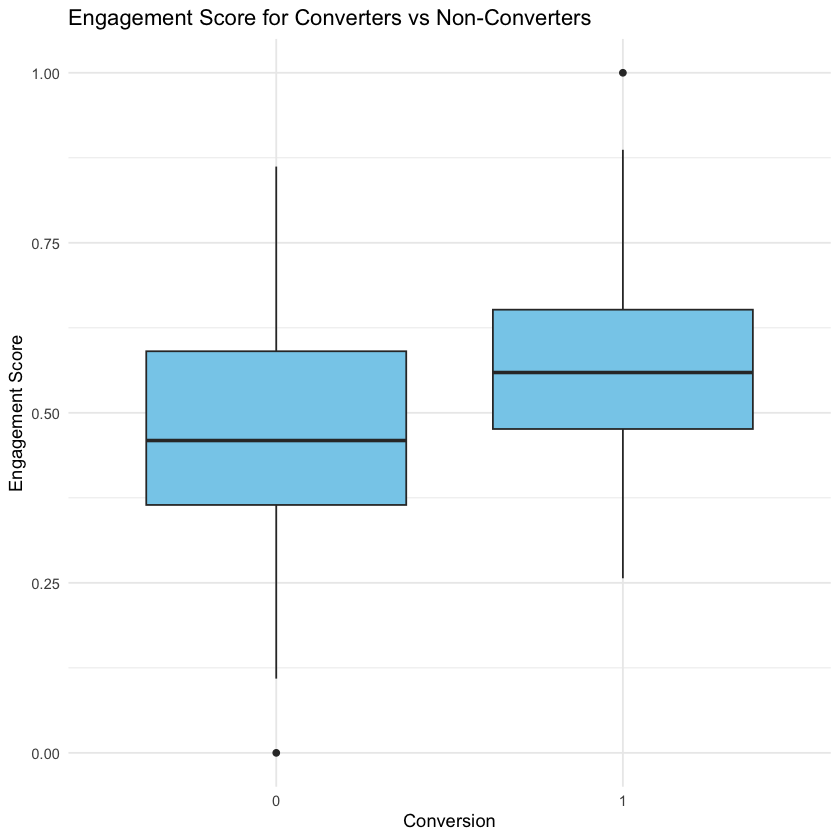

In [ ]:
library(ggplot2)

ggplot(df, aes(x = conversion, y = engagement_score_supervised)) +
  geom_boxplot(fill = "skyblue") +
  labs(
    title = "Engagement Score for Converters vs Non-Converters",
    x = "Conversion",
    y = "Engagement Score"
  ) +
  theme_minimal()


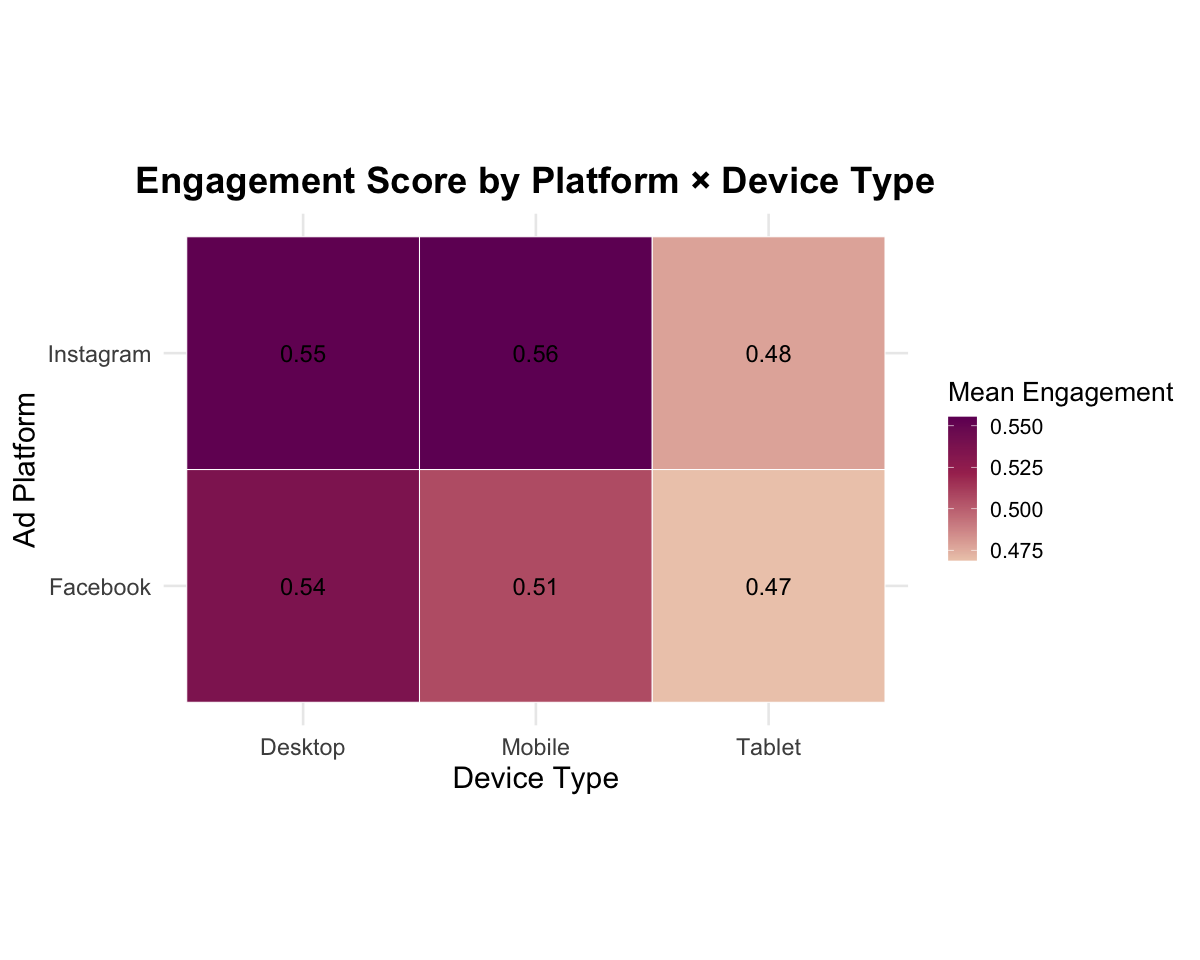

In [ ]:
library(dplyr)
library(ggplot2)

options(repr.plot.width = 10, repr.plot.height = 8) 

pivot_df <- df %>%
  group_by(ad_platform, device_type) %>%
  summarise(
    mean_engagement = mean(engagement_score_supervised, na.rm = TRUE),
    .groups = "drop"
  )

median_value <- median(pivot_df$mean_engagement, na.rm = TRUE)

ggplot(pivot_df, aes(x = device_type, y = ad_platform, fill = mean_engagement)) +
  geom_tile(color = "white") +
  geom_text(aes(label = sprintf("%.2f", mean_engagement)), color = "black", size = 5) +
  scale_fill_gradient2(
    low = "#edcbb8ff",
    mid = "#a8325eff",
    high = "#4f0266ff",
    midpoint = median_value
  ) +
  labs(
    title = "Engagement Score by Platform × Device Type",
    x = "Device Type",
    y = "Ad Platform",
    fill = "Mean Engagement"
  ) +
  theme_minimal(base_size = 16) +
  theme(
    plot.title = element_text(hjust = 0.5, size = 22, face = "bold"),
    axis.title = element_text(size = 18),
    axis.text = element_text(size = 14)
  ) +
  coord_fixed() 


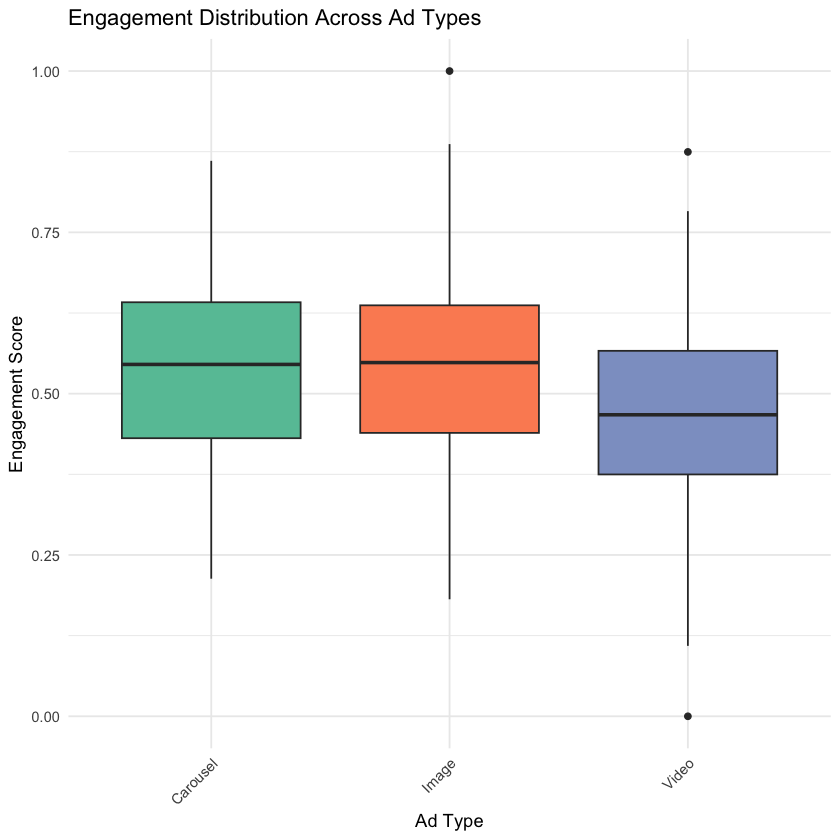

In [ ]:
library(ggplot2)
library(dplyr)

ggplot(df, aes(x = ad_type, y = engagement_score_supervised, fill = ad_type)) +
  geom_boxplot() +
  scale_fill_brewer(palette = "Set2") + 
  labs(
    title = "Engagement Distribution Across Ad Types",
    x = "Ad Type",
    y = "Engagement Score"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), legend.position = "none")


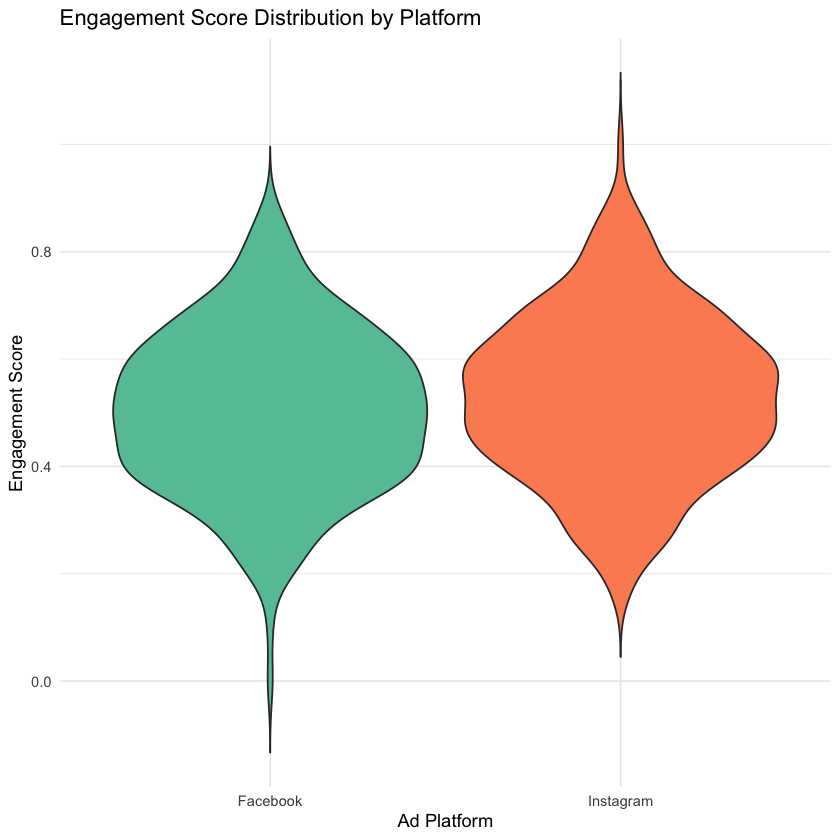

In [ ]:
library(ggplot2)

ggplot(df, aes(x = ad_platform, y = engagement_score_supervised, fill = ad_platform)) +
  geom_violin(trim = FALSE) +         
  scale_fill_brewer(palette = "Set2") +
  labs(
    title = "Engagement Score Distribution by Platform",
    x = "Ad Platform",
    y = "Engagement Score"
  ) +
  theme_minimal() +
  theme(legend.position = "none")


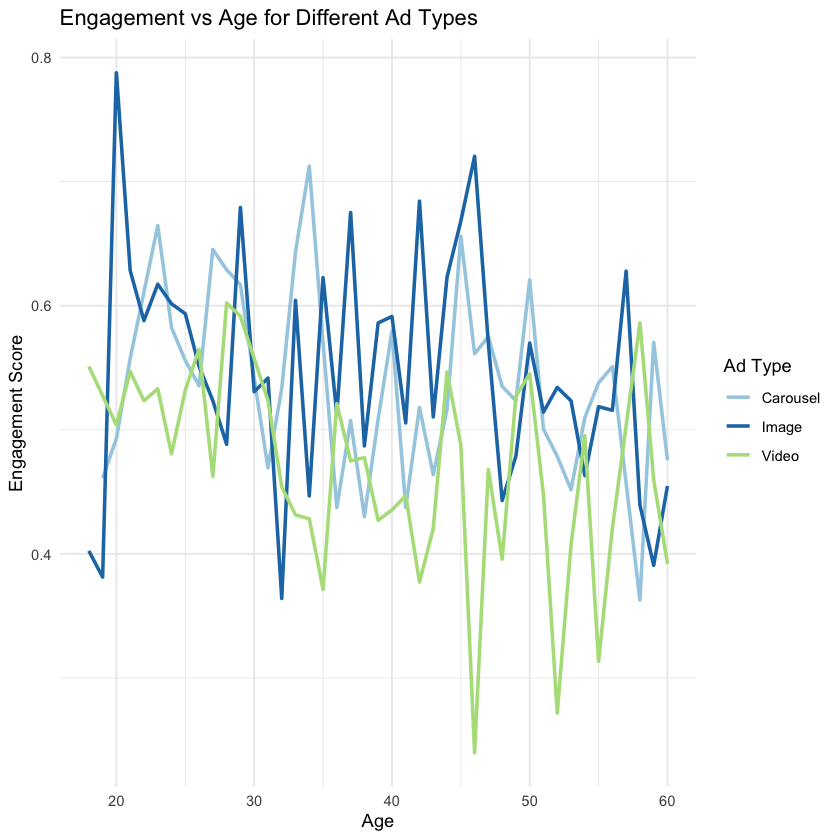

In [ ]:
library(ggplot2)

ggplot(df, aes(x = age, y = engagement_score_supervised, color = ad_type)) +
  geom_line(stat = "summary", fun = "mean", size = 1) +  
  scale_color_brewer(palette = "Paired") +
  labs(
    title = "Engagement vs Age for Different Ad Types",
    x = "Age",
    y = "Engagement Score",
    color = "Ad Type"
  ) +
  theme_minimal()


In [ ]:
library(dplyr)

df <- df %>%
  mutate(
    CTR = if_else(impressions == 0, 0, clicks / impressions)
  )


In [ ]:
df <- df %>%
  mutate(conversion = as.factor(conversion))


model_ctr <- glm(conversion ~ CTR, data = df, family = binomial)
df$prob_ctr <- predict(model_ctr, type = "response")


model_eng <- glm(conversion ~ engagement_score_supervised, data = df, family = binomial)
df$prob_eng <- predict(model_eng, type = "response")


In [ ]:
library(pROC)

y <- as.numeric(as.character(df$conversion))

auc_ctr <- roc(y, df$prob_ctr)$auc
cat("AUC - CTR only:", round(auc_ctr, 4), "\n")

auc_eng <- roc(y, df$prob_eng)$auc
cat("AUC - Engagement Score only:", round(auc_eng, 4), "\n")

Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC - CTR only: 0.6377 


Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC - Engagement Score only: 0.6787 



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


The following objects are masked from ‘package:data.table’:

    dcast, melt




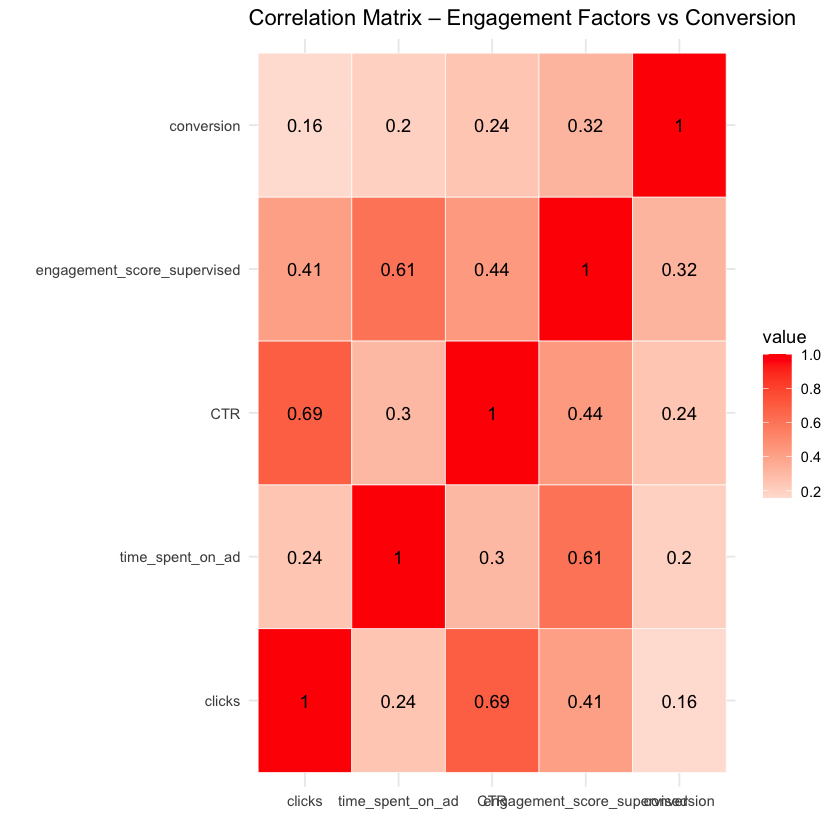

In [ ]:
library(dplyr)
library(ggplot2)
library(reshape2)

corr_data <- df %>%
  select(clicks, time_spent_on_ad, CTR, engagement_score_supervised, conversion)

corr_data$conversion <- as.numeric(as.character(corr_data$conversion))

corr_mat <- cor(corr_data, use = "complete.obs")

corr_melt <- melt(corr_mat)

ggplot(corr_melt, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile(color = "white") +
  geom_text(aes(label = round(value, 2)), color = "black") +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +
  theme_minimal() +
  labs(title = "Correlation Matrix – Engagement Factors vs Conversion",
       x = "", y = "")


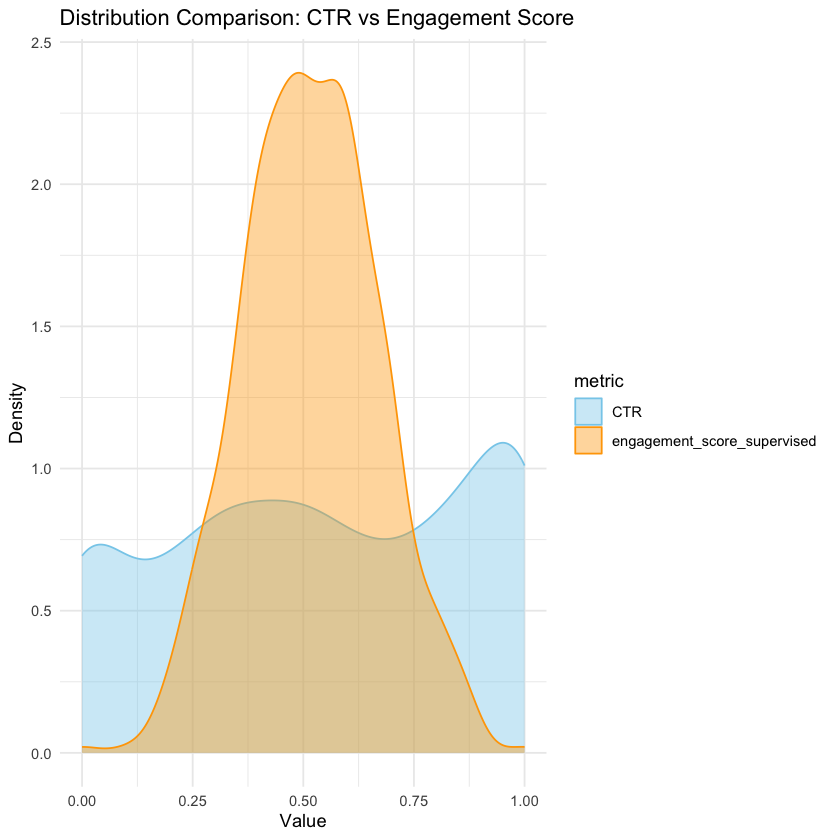

In [ ]:
library(ggplot2)
library(dplyr)
library(tidyr)

df_long <- df %>%
  select(CTR, engagement_score_supervised) %>%
  pivot_longer(cols = everything(), names_to = "metric", values_to = "value")

ggplot(df_long, aes(x = value, fill = metric, color = metric)) +
  geom_density(alpha = 0.4) +
  labs(title = "Distribution Comparison: CTR vs Engagement Score",
       x = "Value", y = "Density") +
  theme_minimal() +
  scale_fill_manual(values = c("CTR" = "skyblue", "engagement_score_supervised" = "orange")) +
  scale_color_manual(values = c("CTR" = "skyblue", "engagement_score_supervised" = "orange"))


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



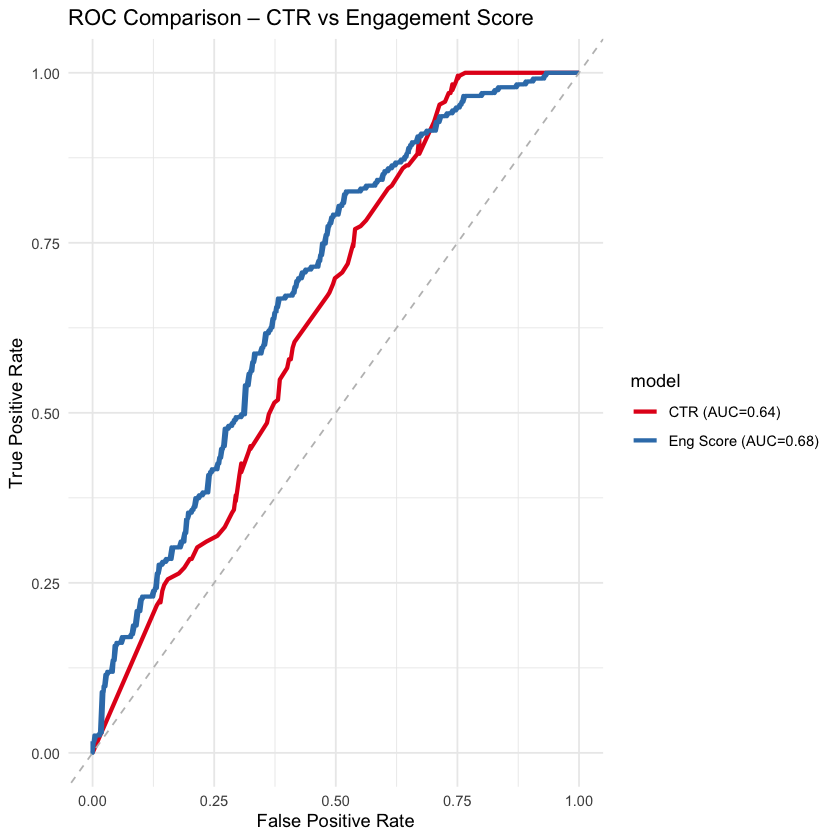

In [ ]:
library(pROC)
library(ggplot2)
library(dplyr)

roc_ctr <- roc(df$conversion, df$CTR)
roc_eng <- roc(df$conversion, df$engagement_score_supervised)

roc_df <- bind_rows(
  data.frame(fpr = 1 - roc_ctr$specificities,
             tpr = roc_ctr$sensitivities,
             model = paste0("CTR (AUC=", round(auc(roc_ctr), 2), ")")),
  data.frame(fpr = 1 - roc_eng$specificities,
             tpr = roc_eng$sensitivities,
             model = paste0("Eng Score (AUC=", round(auc(roc_eng), 2), ")"))
)

ggplot(roc_df, aes(x = fpr, y = tpr, color = model)) +
  geom_line(size = 1.2) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "gray") +
  labs(title = "ROC Comparison – CTR vs Engagement Score",
       x = "False Positive Rate", y = "True Positive Rate") +
  theme_minimal() +
  scale_color_brewer(palette = "Set1")


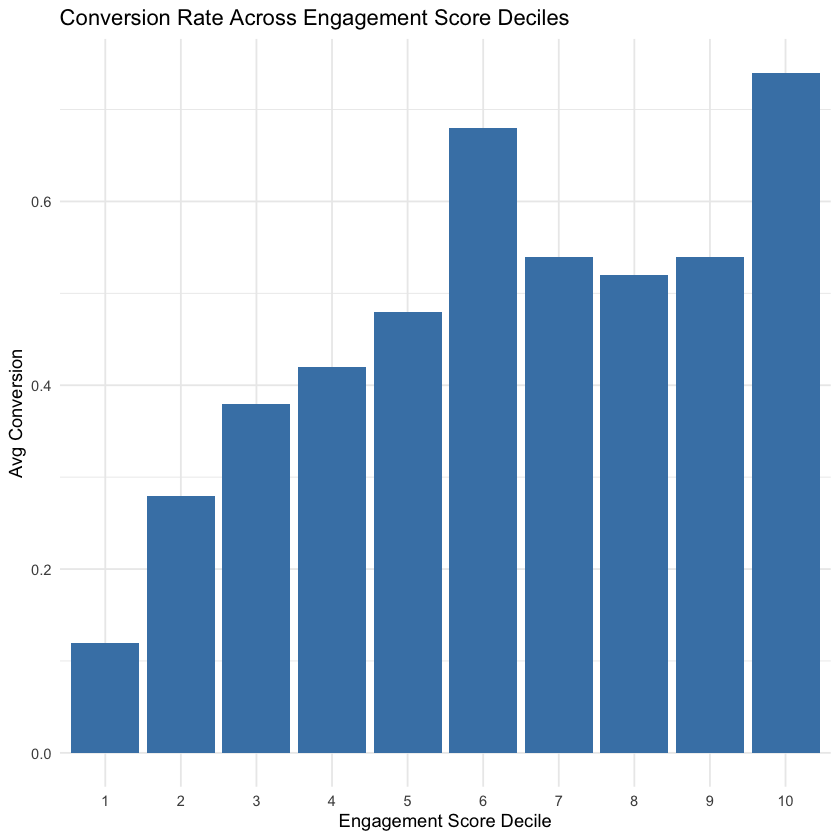

In [ ]:
library(dplyr)
library(ggplot2)

df <- df %>%
  mutate(score_bin = ntile(engagement_score_supervised, 10))

bin_summary <- df %>%
  group_by(score_bin) %>%
  summarise(avg_conversion = mean(as.numeric(as.character(conversion))), .groups = "drop")

ggplot(bin_summary, aes(x = factor(score_bin), y = avg_conversion)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Conversion Rate Across Engagement Score Deciles",
       x = "Engagement Score Decile",
       y = "Avg Conversion") +
  theme_minimal()


In [ ]:
install.packages(
  "hexbin")


The downloaded binary packages are in
	/var/folders/vq/9ksqctns5zl1tj5792ttp1qm0000gn/T//RtmpmujZM3/downloaded_packages


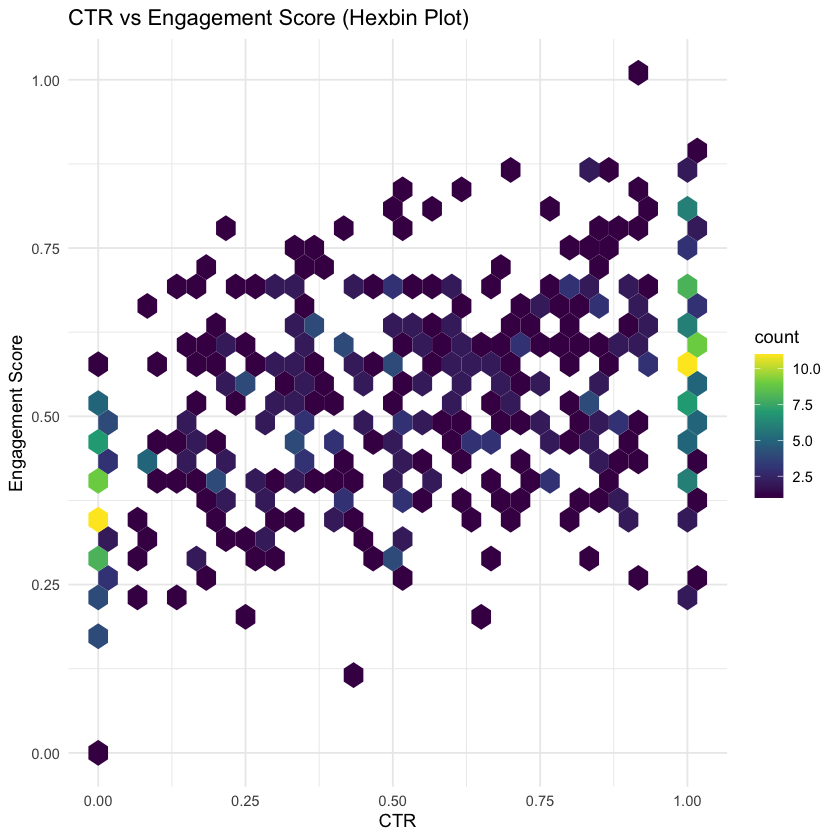

In [ ]:
library(ggplot2)
library(hexbin)

ggplot(df, aes(x = CTR, y = engagement_score_supervised)) +
  geom_hex(bins = 30) +
  scale_fill_viridis_c() +
  labs(title = "CTR vs Engagement Score (Hexbin Plot)",
       x = "CTR",
       y = "Engagement Score") +
  theme_minimal()


In [29]:
df <- read_csv("/Users/shithilshetty/Documents/Projects/ctr-prediction-engagement-modeling/data/social_media_ad_optimization_raw.csv")

df <- df %>%
  mutate(conversion = as.integer(conversion))

Rows: 500 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): user_id, gender, location, interests, ad_id, ad_category, ad_platf...
dbl  (6): age, impressions, clicks, conversion, time_spent_on_ad, engagement...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [30]:
df <- df %>%
  mutate(
    segment = paste(age, gender, interests, location, sep = "_")
  )

df %>%
  select(age, gender, interests, location, segment) %>%
  head()

age,gender,interests,location,segment
<dbl>,<chr>,<chr>,<chr>,<chr>
58,M,Food,USA,58_M_Food_USA
55,F,Tech,USA,55_F_Tech_USA
52,F,Gaming,UK,52_F_Gaming_UK
31,F,Tech,USA,31_F_Tech_USA
52,M,Tech,India,52_M_Tech_India
32,F,Fashion,USA,32_F_Fashion_USA


In [31]:
segment_perf <- df %>%
  group_by(segment) %>%
  summarise(
    impressions_sum = sum(impressions, na.rm = TRUE),
    conversions_sum = sum(conversion, na.rm = TRUE),
    conversion_rate = mean(conversion, na.rm = TRUE),
    n_rows = n()
  ) %>%
  ungroup()

cat("Number of unique segments:", nrow(segment_perf), "\n")

head(segment_perf)

Number of unique segments: 477 


segment,impressions_sum,conversions_sum,conversion_rate,n_rows
<chr>,<dbl>,<int>,<dbl>,<int>
18_F_Fashion_Canada,13,0,0,1
18_M_Fashion_Australia,12,0,0,1
18_M_Travel_UK,3,0,0,1
18_Other_Gaming_India,13,0,0,1
18_Other_Tech_Germany,11,0,0,1
19_F_Fashion_USA,11,0,0,1


In [32]:
 imp_thresh <- quantile(segment_perf$impressions_sum, 0.75, na.rm = TRUE)
conv_thresh <- quantile(segment_perf$conversions_sum, 0.25, na.rm = TRUE)

cat("High-impressions threshold:", imp_thresh, "\n")
cat("Low-conversions threshold:", conv_thresh, "\n")

High-impressions threshold: 12 
Low-conversions threshold: 0 


In [33]:
underperforming_segments <- segment_perf %>%
  filter(
    impressions_sum >= imp_thresh,
    conversions_sum <= conv_thresh
  ) %>%
  arrange(
    desc(impressions_sum),   
    conversion_rate          
  )

cat("Underperforming full audience segments:\n")
head(underperforming_segments, 20)

Underperforming full audience segments:


segment,impressions_sum,conversions_sum,conversion_rate,n_rows
<chr>,<dbl>,<int>,<dbl>,<int>
19_Other_Tech_USA,15,0,0,1
22_F_Tech_Australia,15,0,0,1
22_Other_Food_USA,15,0,0,1
25_F_Food_India,15,0,0,1
26_F_Food_USA,15,0,0,1
27_F_Fashion_USA,15,0,0,1
32_Other_Fitness_India,15,0,0,1
33_M_Fitness_Canada,15,0,0,1
41_M_Fashion_Australia,15,0,0,1


In [34]:
under_df <- underperforming_segments
head(under_df)

segment,impressions_sum,conversions_sum,conversion_rate,n_rows
<chr>,<dbl>,<int>,<dbl>,<int>
19_Other_Tech_USA,15,0,0,1
22_F_Tech_Australia,15,0,0,1
22_Other_Food_USA,15,0,0,1
25_F_Food_India,15,0,0,1
26_F_Food_USA,15,0,0,1
27_F_Fashion_USA,15,0,0,1


In [35]:
bad_segments <- unique(underperforming_segments$segment)

under_df <- df %>%
  filter(segment %in% bad_segments)

under_df <- under_df %>%
  mutate(
    age_group = cut(
      age,
      breaks = seq(0, 70, by = 10),     
      right = FALSE,
      labels = paste0(seq(0, 60, by = 10), "-", seq(9, 69, by = 10))
    ))

In [36]:
agegroup_counts <- under_df %>%
  count(age_group) %>%         
  arrange(age_group)          

agegroup_counts

age_group,n
<fct>,<int>
10-19,5
20-29,16
30-39,14
40-49,21
50-59,17
60-69,2


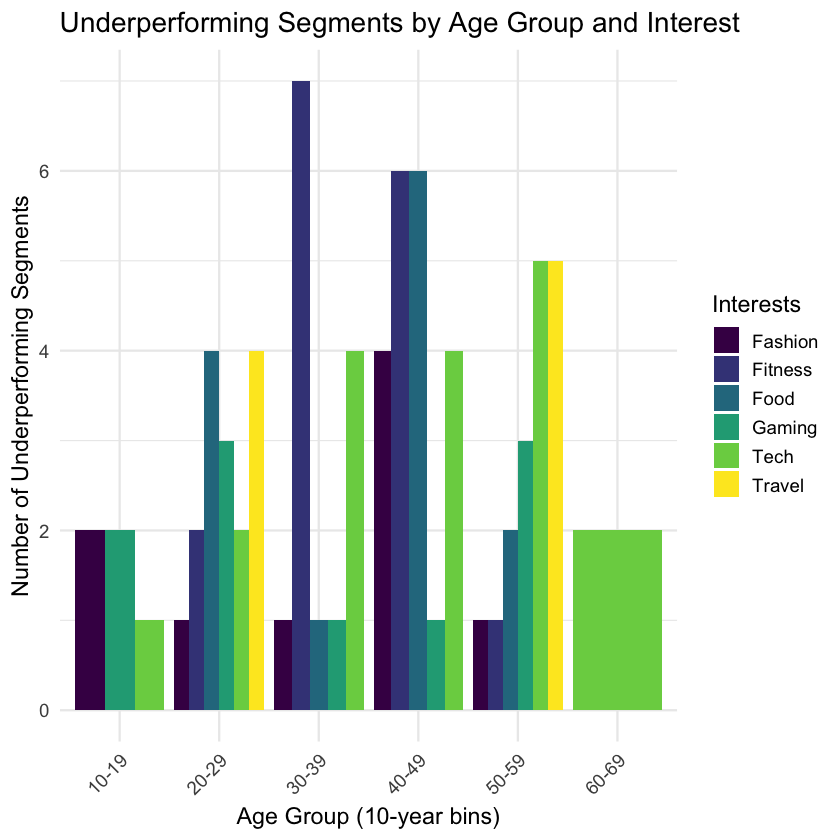

In [37]:
library(ggplot2)

ggplot(under_df, aes(x = age_group, fill = interests)) +
  geom_bar(position = "dodge") +
  scale_fill_viridis_d() +   
  labs(
    title = "Underperforming Segments by Age Group and Interest",
    x = "Age Group (10-year bins)",
    y = "Number of Underperforming Segments",
    fill = "Interests"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

Suggestion 1: Visualization for Underperforming Segments by Device × Day of Week

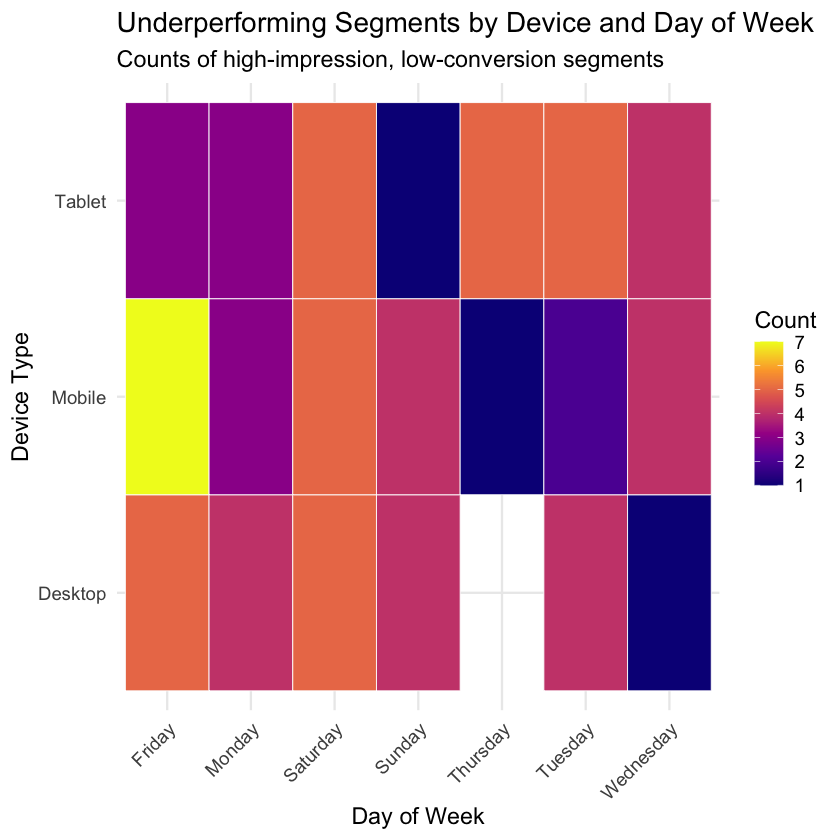

In [39]:
library(dplyr)
library(ggplot2)

under_context <- under_df %>%
  group_by(device_type, day_of_week) %>%
  summarise(
    n_underperforming = n(),
    avg_conversion = mean(conversion, na.rm = TRUE),
    .groups = "drop"
  )

ggplot(under_context, aes(
  x = day_of_week,
  y = device_type,
  fill = n_underperforming
)) +
  geom_tile(color = "white") +
  scale_fill_viridis_c(option = "plasma") +
  labs(
    title = "Underperforming Segments by Device and Day of Week",
    subtitle = "Counts of high-impression, low-conversion segments",
    x = "Day of Week",
    y = "Device Type",
    fill = "Count"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)
  )


In [40]:
install.packages('ggplot2', repos='http://cran.us.r-project.org', quiet=TRUE)
library(ggplot2)

In [41]:
df <- read_csv("/Users/shithilshetty/Documents/Projects/ctr-prediction-engagement-modeling/data/social_media_ad_optimization_raw.csv")

head(df)

Rows: 500 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): user_id, gender, location, interests, ad_id, ad_category, ad_platf...
dbl  (6): age, impressions, clicks, conversion, time_spent_on_ad, engagement...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


user_id,age,gender,location,interests,ad_id,ad_category,ad_platform,ad_type,impressions,clicks,conversion,time_spent_on_ad,day_of_week,device_type,engagement_score
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
U0001,58,M,USA,Food,A0001,Sportswear,Facebook,Image,3,0,0,3.38,Friday,Mobile,0.02
U0002,55,F,USA,Tech,A0002,Electronics,Facebook,Image,9,9,1,6.77,Saturday,Tablet,0.93
U0003,52,F,UK,Gaming,A0003,Luggage,Instagram,Image,13,12,1,13.26,Wednesday,Mobile,0.93
U0004,31,F,USA,Tech,A0004,Gadgets,Facebook,Video,14,5,0,24.41,Saturday,Desktop,0.28
U0005,52,M,India,Tech,A0005,Luggage,Instagram,Carousel,10,5,0,21.43,Monday,Tablet,0.35
U0006,32,F,USA,Fashion,A0006,Electronics,Instagram,Video,8,5,1,11.30,Saturday,Desktop,0.77


In [ ]:
cat_cols <- c('user_id', 'gender', 'location', 'interests',
              'ad_id', 'ad_category', 'ad_platform', 'ad_type',
              'day_of_week', 'device_type')

for (col in cat_cols) {
  df[[col]] <- as.factor(df[[col]])
}

str(df)


spc_tbl_ [500 × 16] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ user_id         : Factor w/ 500 levels "U0001","U0002",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ age             : num [1:500] 58 55 52 31 52 32 59 32 38 55 ...
 $ gender          : Factor w/ 3 levels "F","M","Other": 2 1 1 1 2 1 2 3 2 1 ...
 $ location        : Factor w/ 6 levels "Australia","Canada",..: 6 6 5 6 4 6 3 2 1 3 ...
 $ interests       : Factor w/ 6 levels "Fashion","Fitness",..: 3 5 4 5 5 1 3 5 4 4 ...
 $ ad_id           : Factor w/ 50 levels "A0001","A0002",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ ad_category     : Factor w/ 6 levels "Apparel","Electronics",..: 6 2 5 4 5 2 1 1 4 6 ...
 $ ad_platform     : Factor w/ 2 levels "Facebook","Instagram": 1 1 2 1 2 2 1 1 2 1 ...
 $ ad_type         : Factor w/ 3 levels "Carousel","Image",..: 2 2 2 3 1 3 2 3 2 2 ...
 $ impressions     : num [1:500] 3 9 13 14 10 8 8 7 5 9 ...
 $ clicks          : num [1:500] 0 9 12 5 5 5 6 4 1 7 ...
 $ conversion      : num [1:500] 0 1 1 0 0 1 1 1 1 1 ...


In [ ]:

df$CTR <- ifelse(
  df$impressions > 0,
  df$clicks / df$impressions,
  NA
)

summary(df$CTR)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2625  0.5333  0.5399  0.8571  1.0000 

In [ ]:
group_cols <- c("ad_platform", "ad_type", "day_of_week", "device_type")

ctr_group <- aggregate(
    x = list(
        total_impressions = df$impressions,
        total_clicks = df$clicks,
        n_records = as.numeric(df$user_id) 
    ),
    by = df[group_cols],
    FUN = sum
)

ctr_group$CTR_group <- ctr_group$total_clicks / ctr_group$total_impressions

ctr_group$CTR_group <- ifelse(
  ctr_group$total_impressions == 0,
  NA, 
  ctr_group$CTR_group
)

head(ctr_group)

,ad_platform,ad_type,day_of_week,device_type,total_impressions,total_clicks,n_records,CTR_group
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,Facebook,Carousel,Friday,Desktop,45,16,1727,0.3555556
2,Instagram,Carousel,Friday,Desktop,4,2,477,0.5000000
3,Facebook,Image,Friday,Desktop,28,16,1168,0.5714286
4,Instagram,Image,Friday,Desktop,14,10,632,0.7142857
5,Facebook,Video,Friday,Desktop,82,36,1873,0.4390244
6,Instagram,Video,Friday,Desktop,27,10,901,0.3703704


In [ ]:
ctr_group_sorted <- ctr_group[order(-ctr_group$CTR_group), ]

head(ctr_group_sorted, 10)

,ad_platform,ad_type,day_of_week,device_type,total_impressions,total_clicks,n_records,CTR_group
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
109,Instagram,Carousel,Thursday,Tablet,4,4,171,1.0000000
27,Facebook,Image,Thursday,Desktop,10,9,303,0.9000000
78,Instagram,Video,Tuesday,Mobile,38,34,1633,0.8947368
112,Facebook,Video,Thursday,Tablet,19,17,452,0.8947368
113,Instagram,Video,Thursday,Tablet,16,14,419,0.8750000
12,Instagram,Video,Monday,Desktop,21,18,734,0.8571429
32,Instagram,Carousel,Tuesday,Desktop,25,21,1064,0.8400000
120,Facebook,Carousel,Wednesday,Tablet,30,25,360,0.8333333
105,Instagram,Image,Sunday,Tablet,29,24,1002,0.8275862


In [46]:
tail(ctr_group_sorted, 10)


,ad_platform,ad_type,day_of_week,device_type,total_impressions,total_clicks,n_records,CTR_group
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
110,Facebook,Image,Thursday,Tablet,60,20,2038,0.3333333
61,Facebook,Carousel,Sunday,Mobile,58,19,841,0.3275862
29,Facebook,Video,Thursday,Desktop,19,6,1068,0.3157895
45,Facebook,Image,Friday,Mobile,16,5,108,0.3125000
36,Instagram,Video,Tuesday,Desktop,60,18,1324,0.3000000
20,Instagram,Carousel,Sunday,Desktop,64,19,1772,0.2968750
7,Facebook,Carousel,Monday,Desktop,13,3,486,0.2307692
73,Facebook,Carousel,Tuesday,Mobile,5,1,447,0.2000000
58,Instagram,Image,Saturday,Mobile,34,6,1917,0.1764706


In [ ]:
install.packages("rpart", repos="http://cran.us.r-project.org")
install.packages("rpart.plot", repos="http://cran.us.r-project.org")
install.packages("tree", repos="http://cran.us.r-project.org")


The downloaded binary packages are in
	/var/folders/vq/9ksqctns5zl1tj5792ttp1qm0000gn/T//RtmpVh6r7F/downloaded_packages

The downloaded binary packages are in
	/var/folders/vq/9ksqctns5zl1tj5792ttp1qm0000gn/T//RtmpVh6r7F/downloaded_packages

The downloaded binary packages are in
	/var/folders/vq/9ksqctns5zl1tj5792ttp1qm0000gn/T//RtmpVh6r7F/downloaded_packages


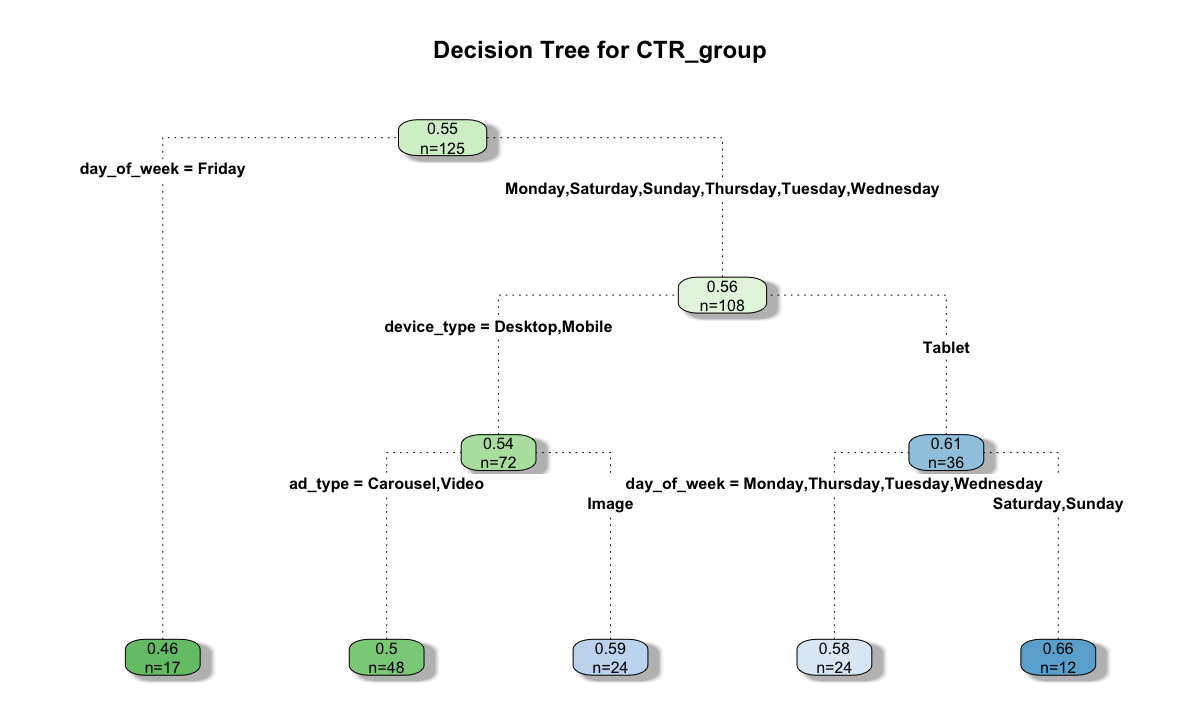

In [ ]:

library(rpart)
library(rpart.plot)


options(repr.plot.width = 10, repr.plot.height = 6) 


group_cols <- c("ad_platform", "ad_type", "day_of_week", "device_type")

sample_weight <- ctr_group$total_impressions

model_formula <- as.formula(paste("CTR_group ~", paste(group_cols, collapse = " + ")))

tree_model <- rpart(
    formula = model_formula,
    data = ctr_group,
    method = "anova",
    control = rpart.control(
        maxdepth = 3,
        minsplit = 10,
        xval = 0
    ),
    weights = sample_weight
)
par(bg = "white")

rpart.plot(
  tree_model,
  type = 4,
  extra = 1,
  main = "Decision Tree for CTR_group",
  box.palette = "GnBu",  
  branch.lty = 3,
  shadow.col = "gray",
  cex = 0.8
)


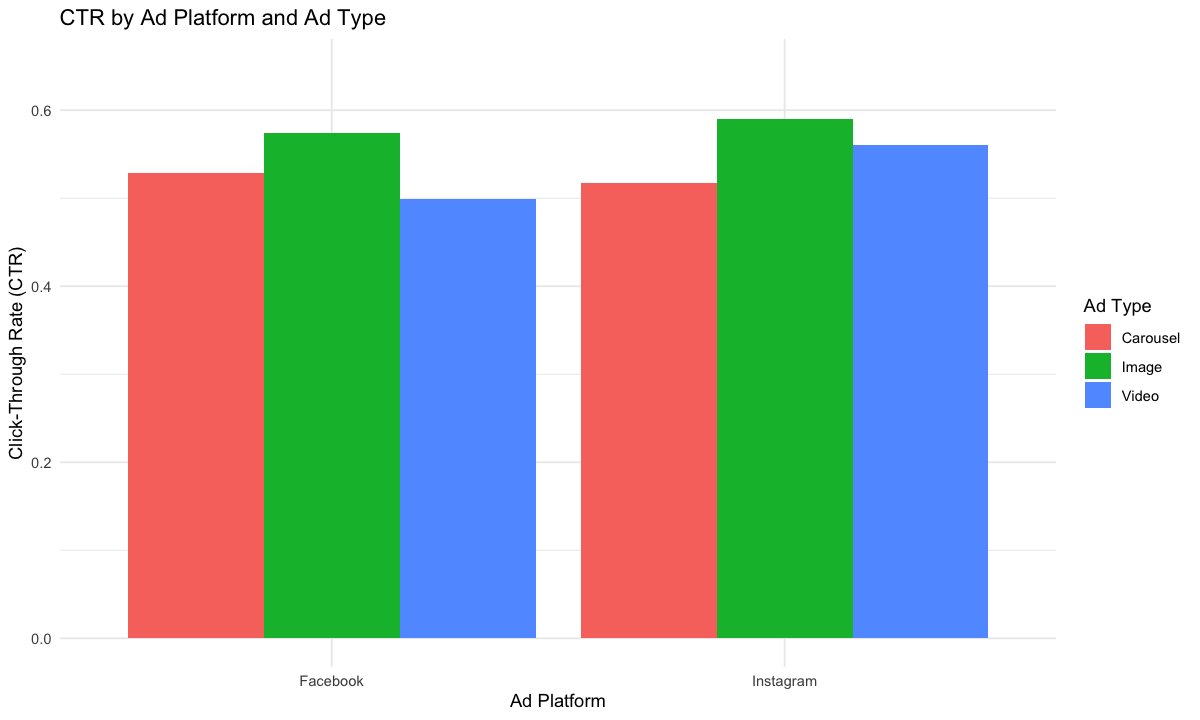

In [ ]:
group_cols_plot <- c("ad_platform", "ad_type")

ctr_platform_type <- aggregate(
    x = list(
        total_impressions = df$impressions,
        total_clicks = df$clicks
    ),
    by = df[group_cols_plot],
    FUN = sum 
)

ctr_platform_type$CTR <- ctr_platform_type$total_clicks / ctr_platform_type$total_impressions

ctr_platform_type <- ctr_platform_type[order(ctr_platform_type$CTR, decreasing = TRUE), ]


ggplot(ctr_platform_type, aes(x = ad_platform, y = CTR, fill = ad_type)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(
    title = "CTR by Ad Platform and Ad Type",
    y = "Click-Through Rate (CTR)",
    x = "Ad Platform",
    fill = "Ad Type"
  ) +
  theme_minimal() +
  scale_y_continuous(limits = c(0, max(ctr_platform_type$CTR, na.rm = TRUE) * 1.1))


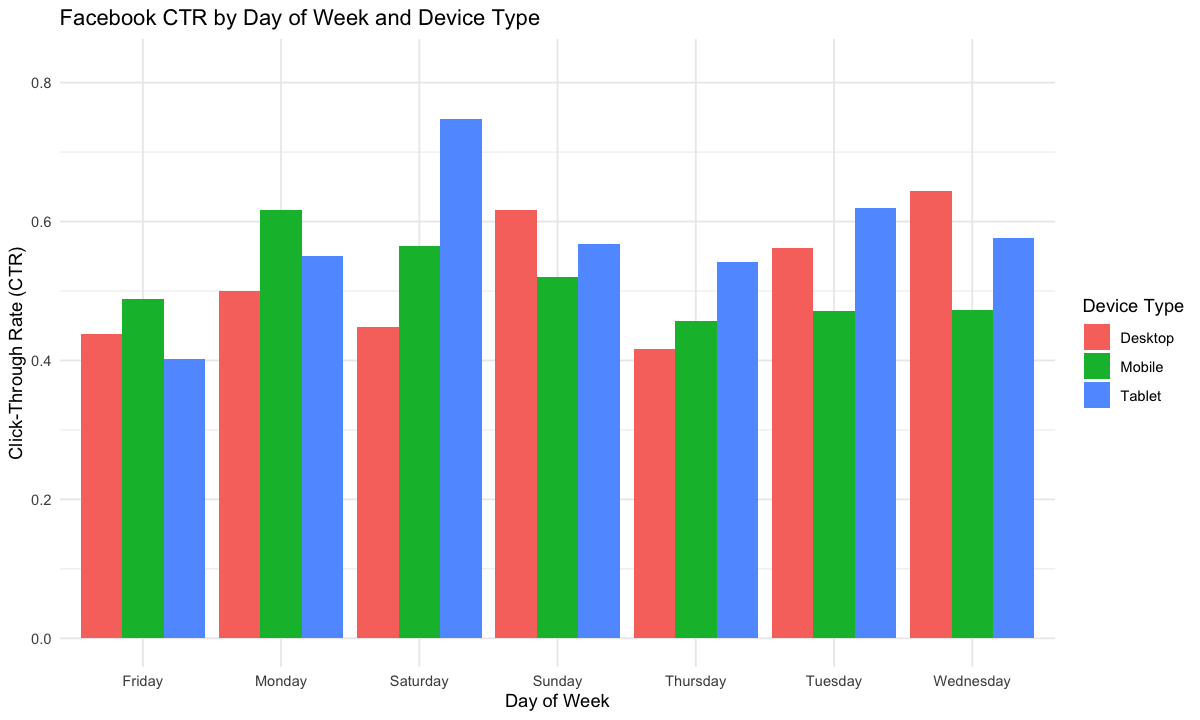

In [ ]:

fb <- df[df$ad_platform == "Facebook", ]

group_cols_fb <- c("day_of_week", "device_type")

fb_ctr_day_device <- aggregate(
    x = list(
        total_impressions = fb$impressions,
        total_clicks = fb$clicks
    ),
    by = fb[group_cols_fb],
    FUN = sum
)

fb_ctr_day_device$CTR <- fb_ctr_day_device$total_clicks / fb_ctr_day_device$total_impressions

fb_ctr_day_device <- fb_ctr_day_device[order(fb_ctr_day_device$CTR, decreasing = TRUE), ]


ggplot(fb_ctr_day_device, aes(x = day_of_week, y = CTR, fill = device_type)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(
    title = "Facebook CTR by Day of Week and Device Type",
    y = "Click-Through Rate (CTR)",
    x = "Day of Week",
    fill = "Device Type"
  ) +
  theme_minimal() +
  scale_y_continuous(limits = c(0, max(fb_ctr_day_device$CTR, na.rm = TRUE) * 1.1))
